In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import pandas as pd
import sys

'''
src_path = sys.path[0].replace("figures\visualization\script", "src")
#replace notebook as scripts
data_path = sys.path[0].replace("figures\visualization\script", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures\visualization\script", "output")
'''

# set default params of plot
rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
mpl.rcParams.update(rc_)

from plot_helper import *
path_prefix=r'D:\Codes\Energy_grid_new'
#path_prefix=r'L:\Coding_project\Energy_grid_new'

# plot for thesis topic 1

to testify the MPC performance with and without dc in a wider test scope

In [2]:
# include following param settings
# MPC-GT
# MPC-Prediction
# MPC-Disturbance-normal-0.03
# MPC-Heuristic
# MPC-Naive
# RBC-MSC

A. 12months dc=0.6&dc=0

In [3]:
# load data

path=path_prefix+r"\output\experiments\thesis_topic1\6h-bat-12months-0.6dc.xlsx"
df_6dc=pd.read_excel(path)
df_opex_6dc=pre_process(df_6dc,'OPEX','month_of_year')
df_tou_6dc=pre_process(df_6dc,"tou_cost",'month_of_year')

path=path_prefix+r"\output\experiments\thesis_topic1\6h-bat-12months-0dc.xlsx"
df_0dc=pd.read_excel(path)
df_opex_0dc=pre_process(df_0dc,'OPEX','month_of_year')
df_tou_0dc=pre_process(df_0dc,"tou_cost",'month_of_year')

   strategy   pred_model  month_of_year        OPEX            label   
0       MPC           GT              1  351.747123           MPC-GT  \
1       MPC   Prediction              1  364.843711   MPC-Prediction   
2       MPC  Disturbance              1  357.335552  MPC-Disturbance   
3       MPC    Heuristic              1  360.866129    MPC-Heuristic   
4       MPC        Naive              1  360.946711        MPC-Naive   
..      ...          ...            ...         ...              ...   
67      MPC   Prediction             12  335.081370   MPC-Prediction   
68      MPC  Disturbance             12  326.453428  MPC-Disturbance   
69      MPC    Heuristic             12  326.782327    MPC-Heuristic   
70      MPC        Naive             12  329.790152        MPC-Naive   
71      MSC           GT             12  400.684694           MSC-GT   

    relative_OPEX  
0        0.000000  
1       14.998987  
2        6.400200  
3       10.443625  
4       10.535912  
..            .

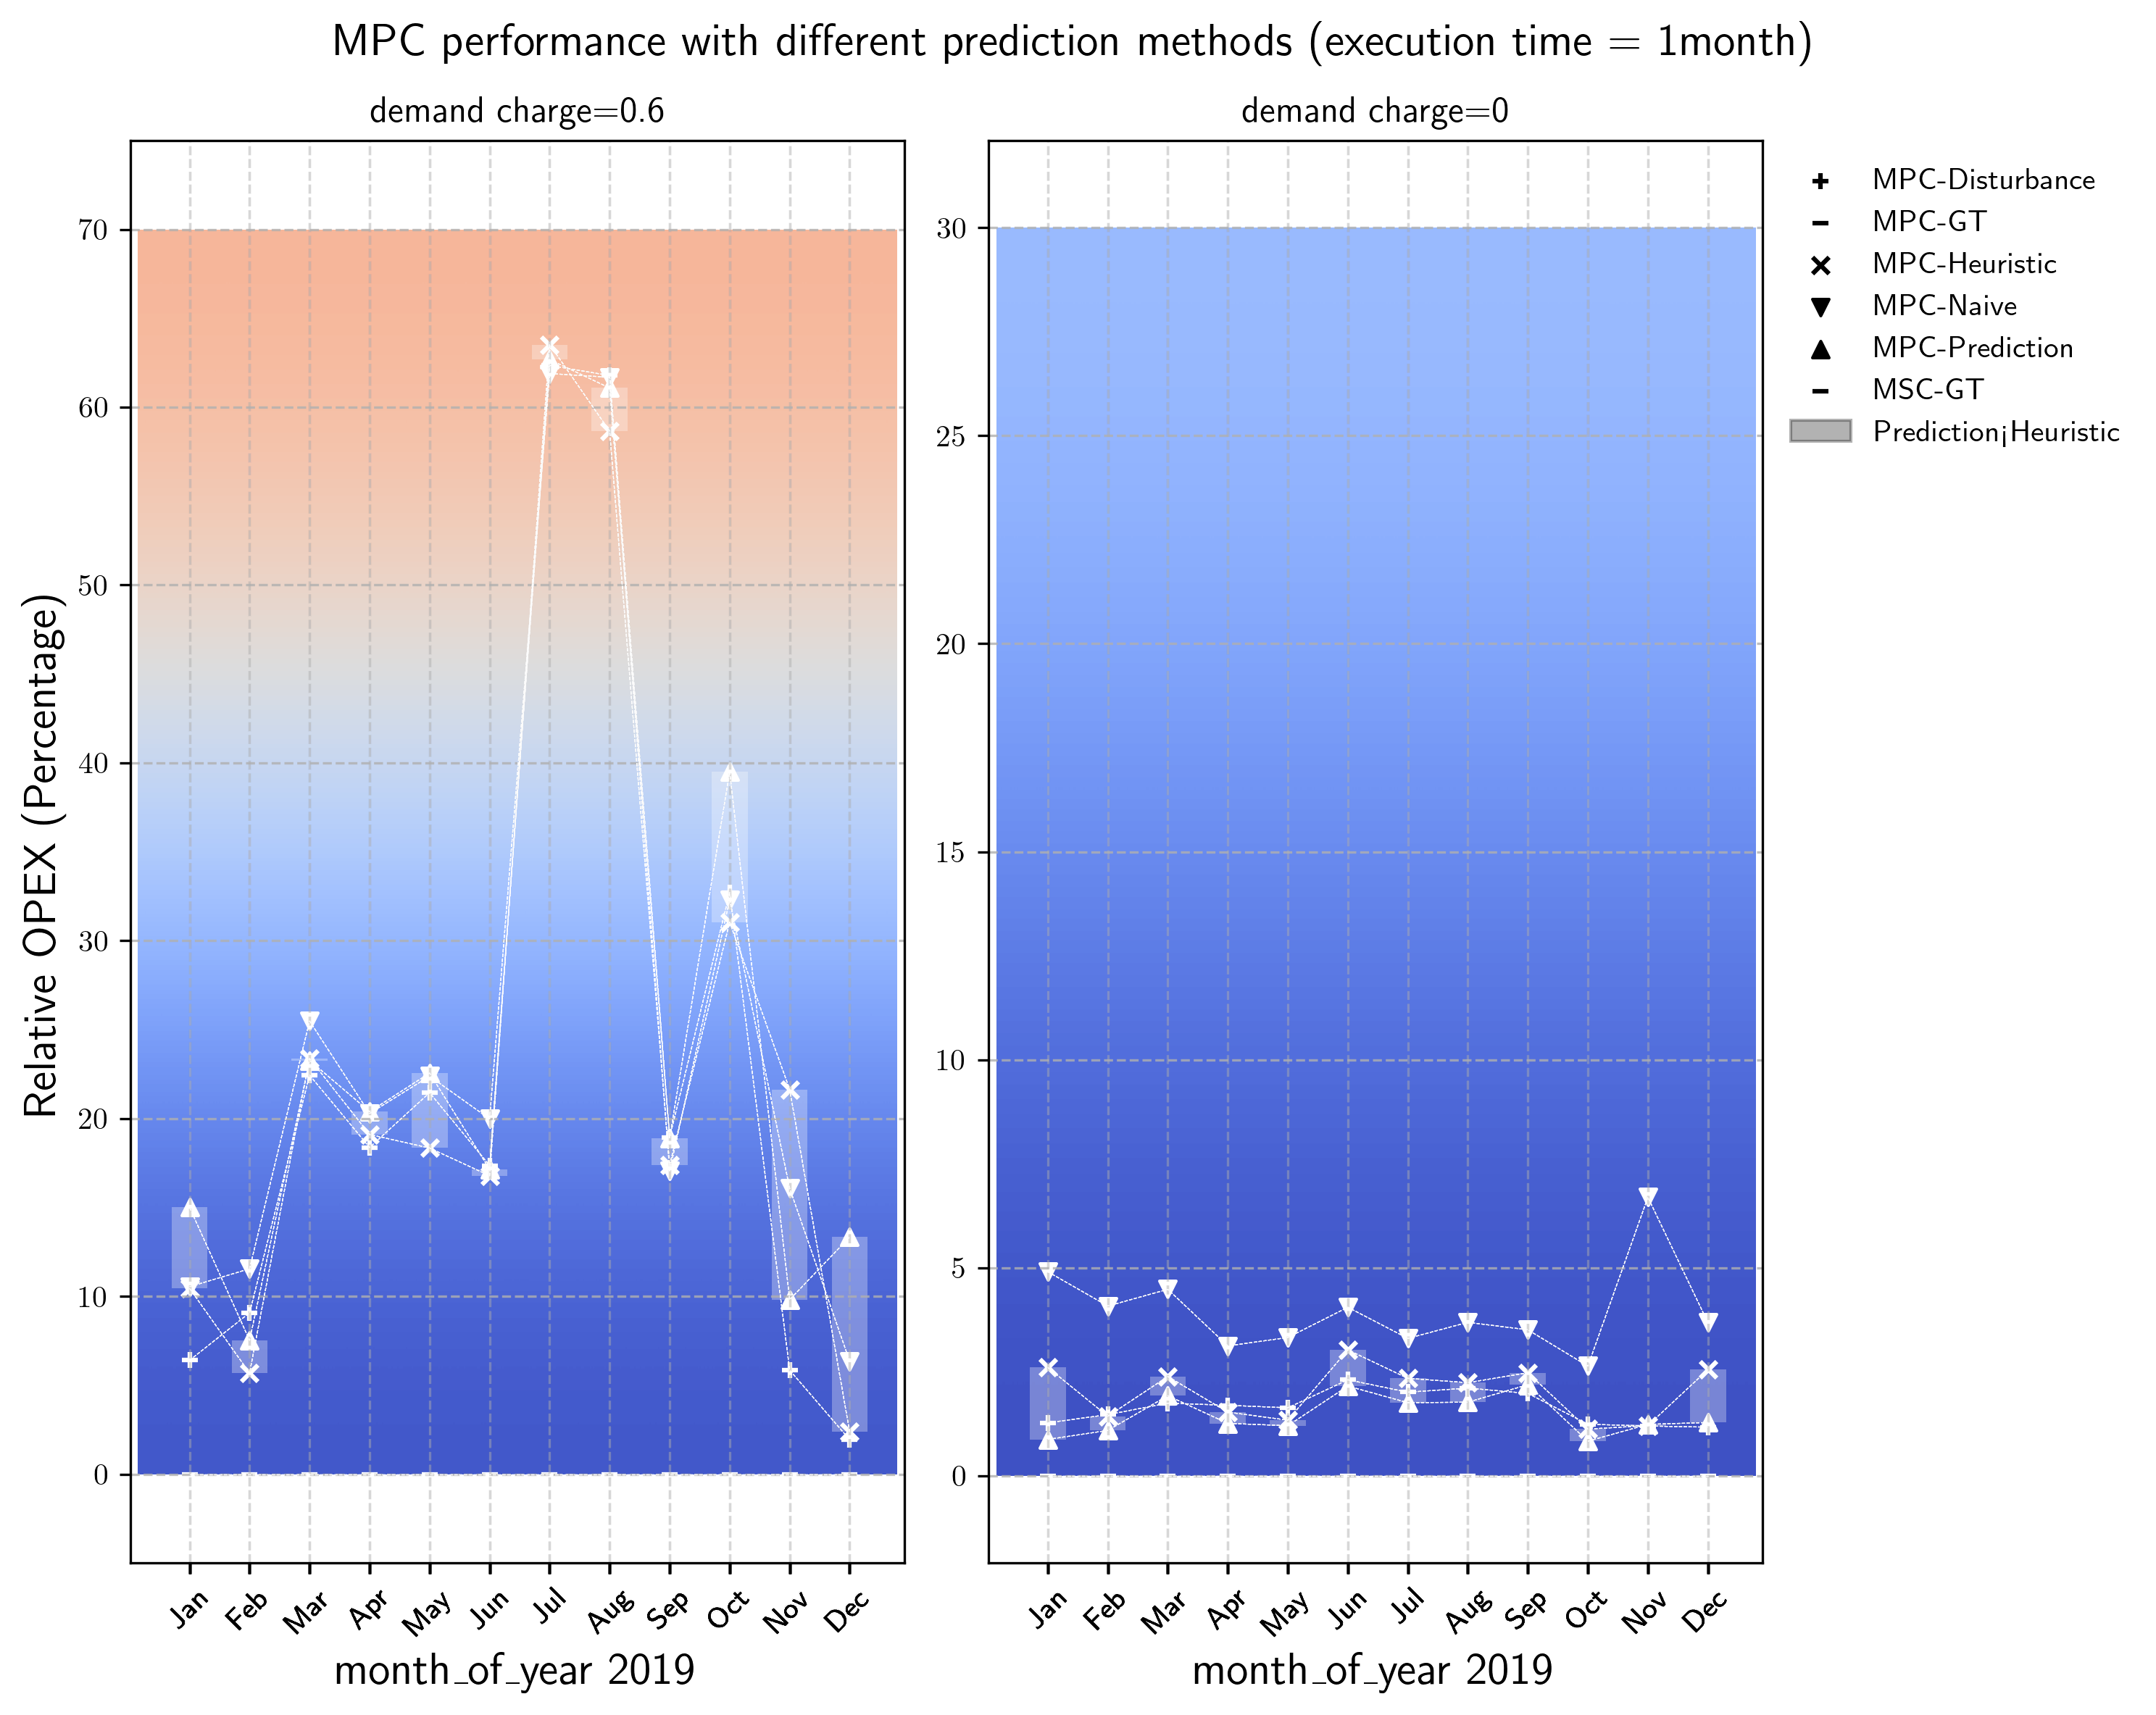

In [5]:

plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[-5,75],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[-2.1,32.1],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":True,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":False,
    "show_line":True,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex-line-gradient.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)


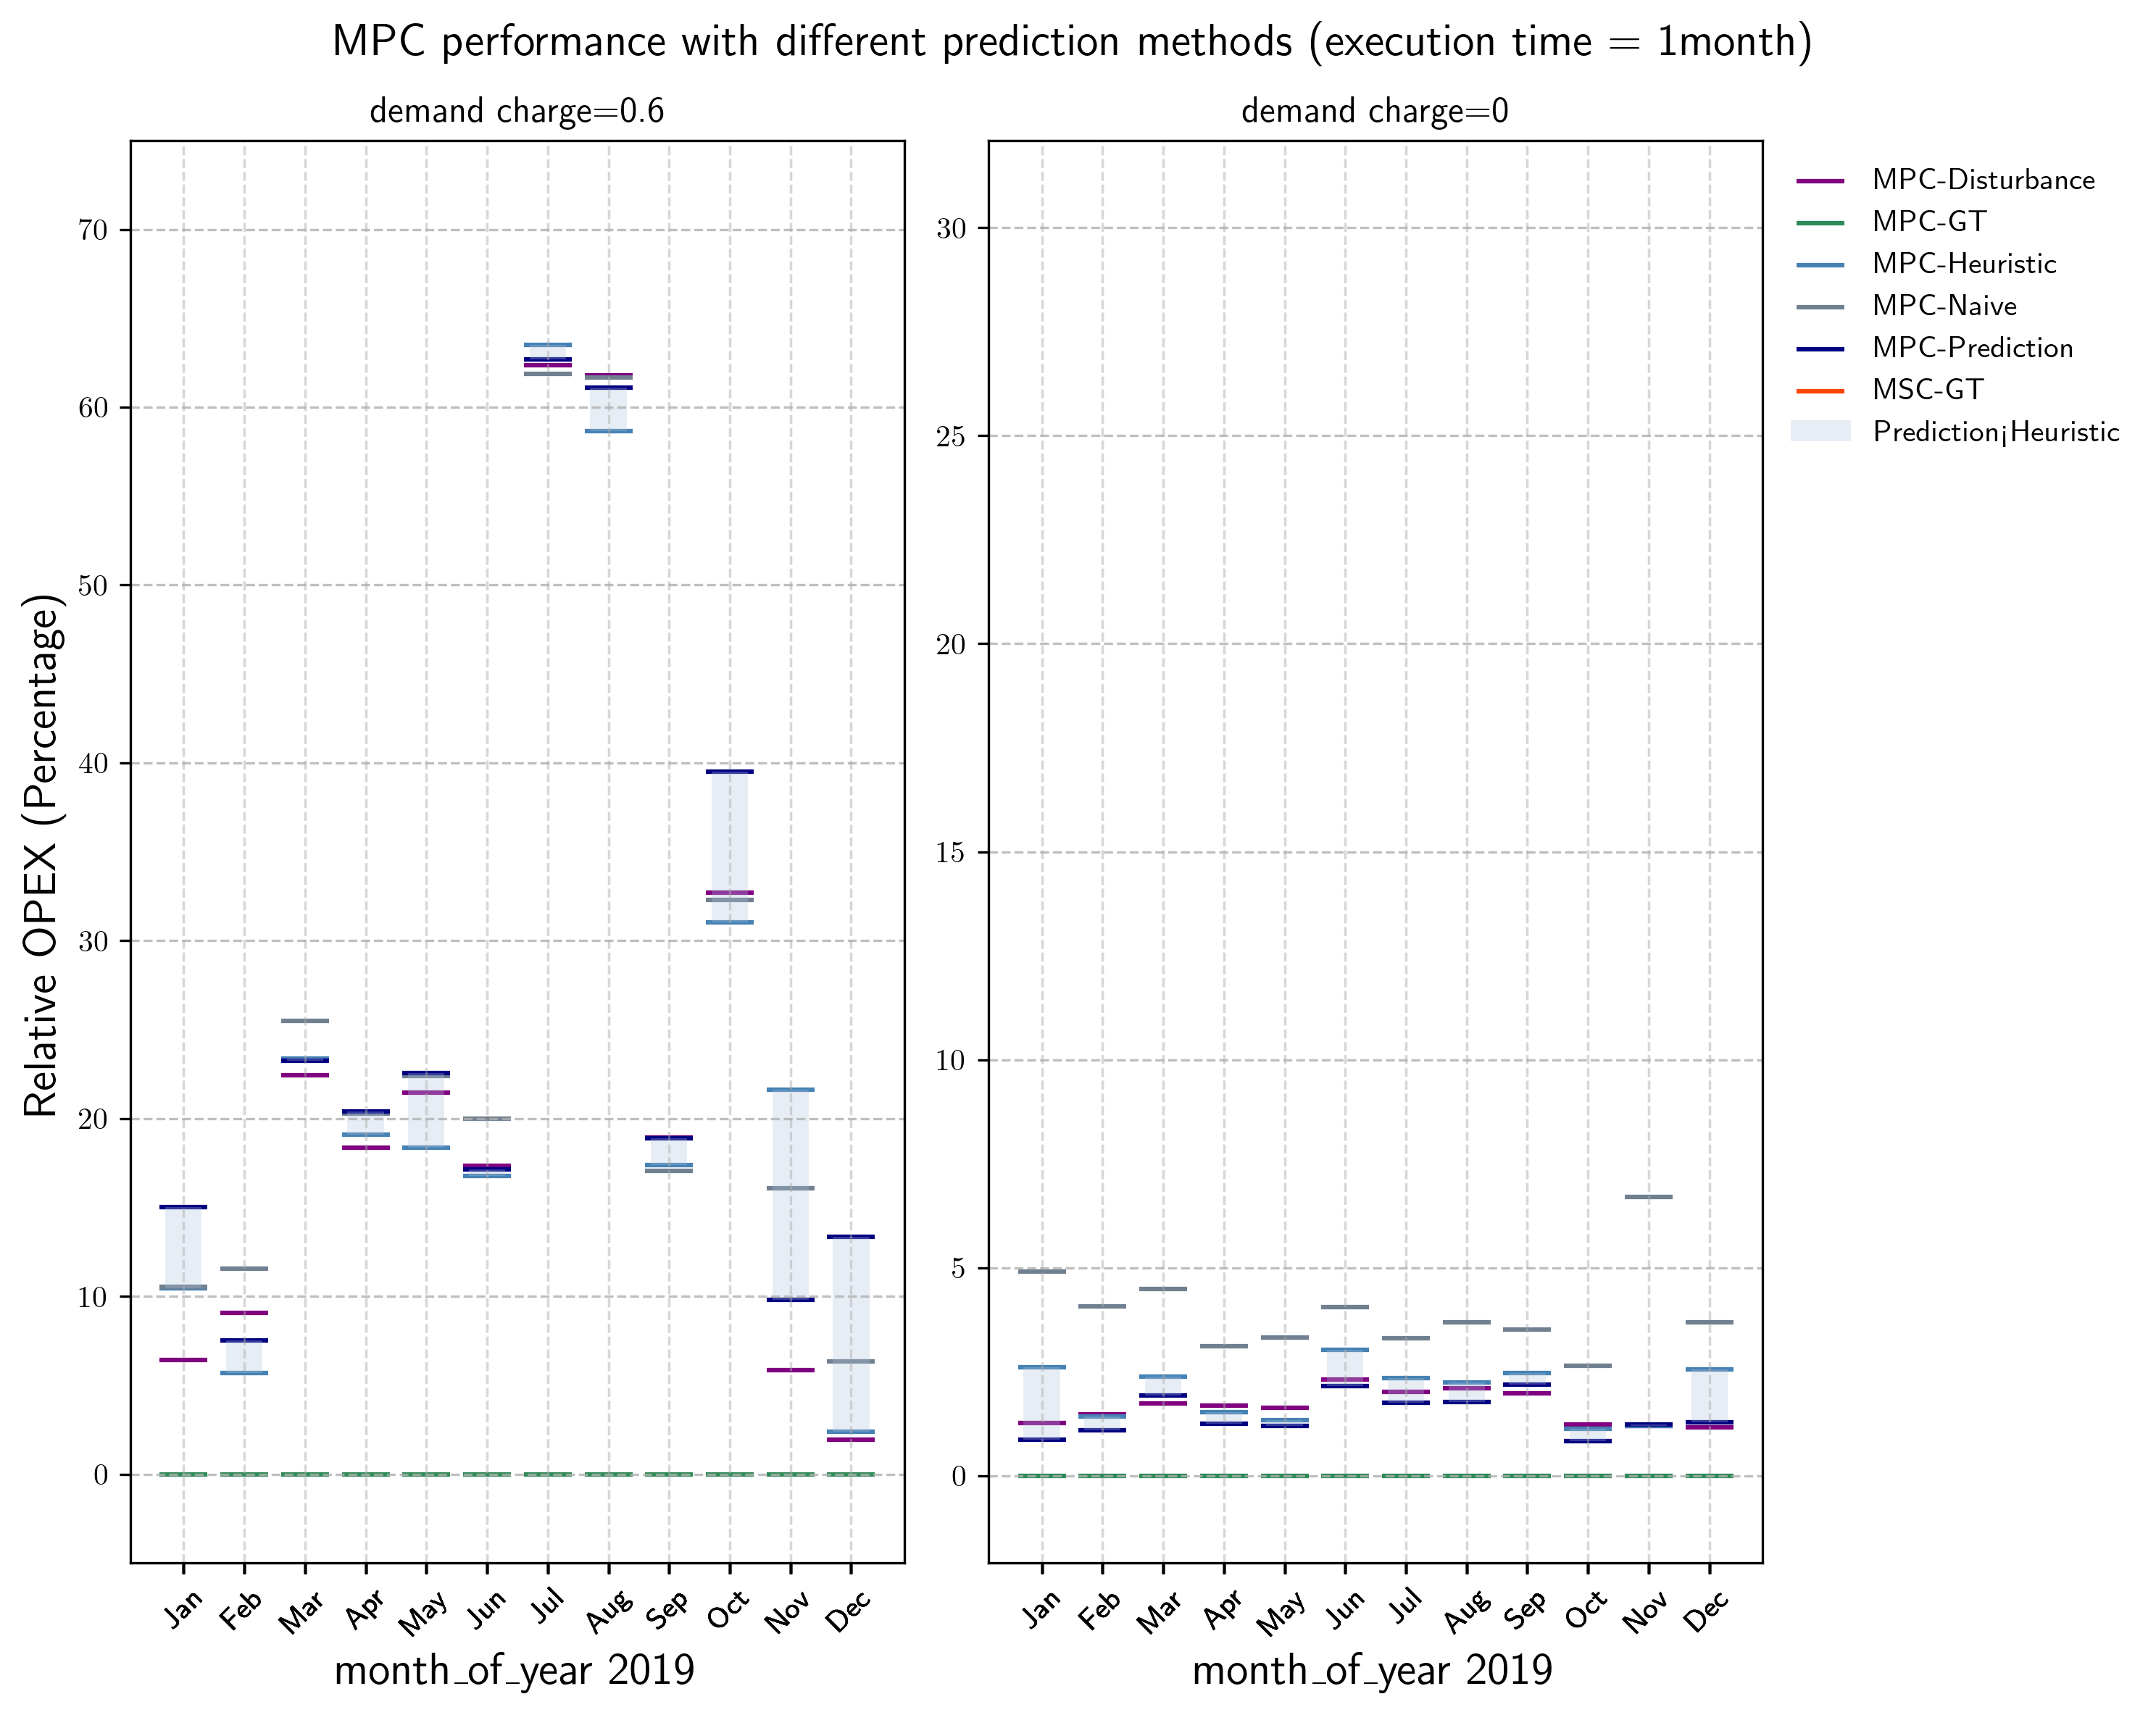

In [4]:
plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[-5,75],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[-2.1,32.1],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":True,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":False,
    "show_line":False,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)

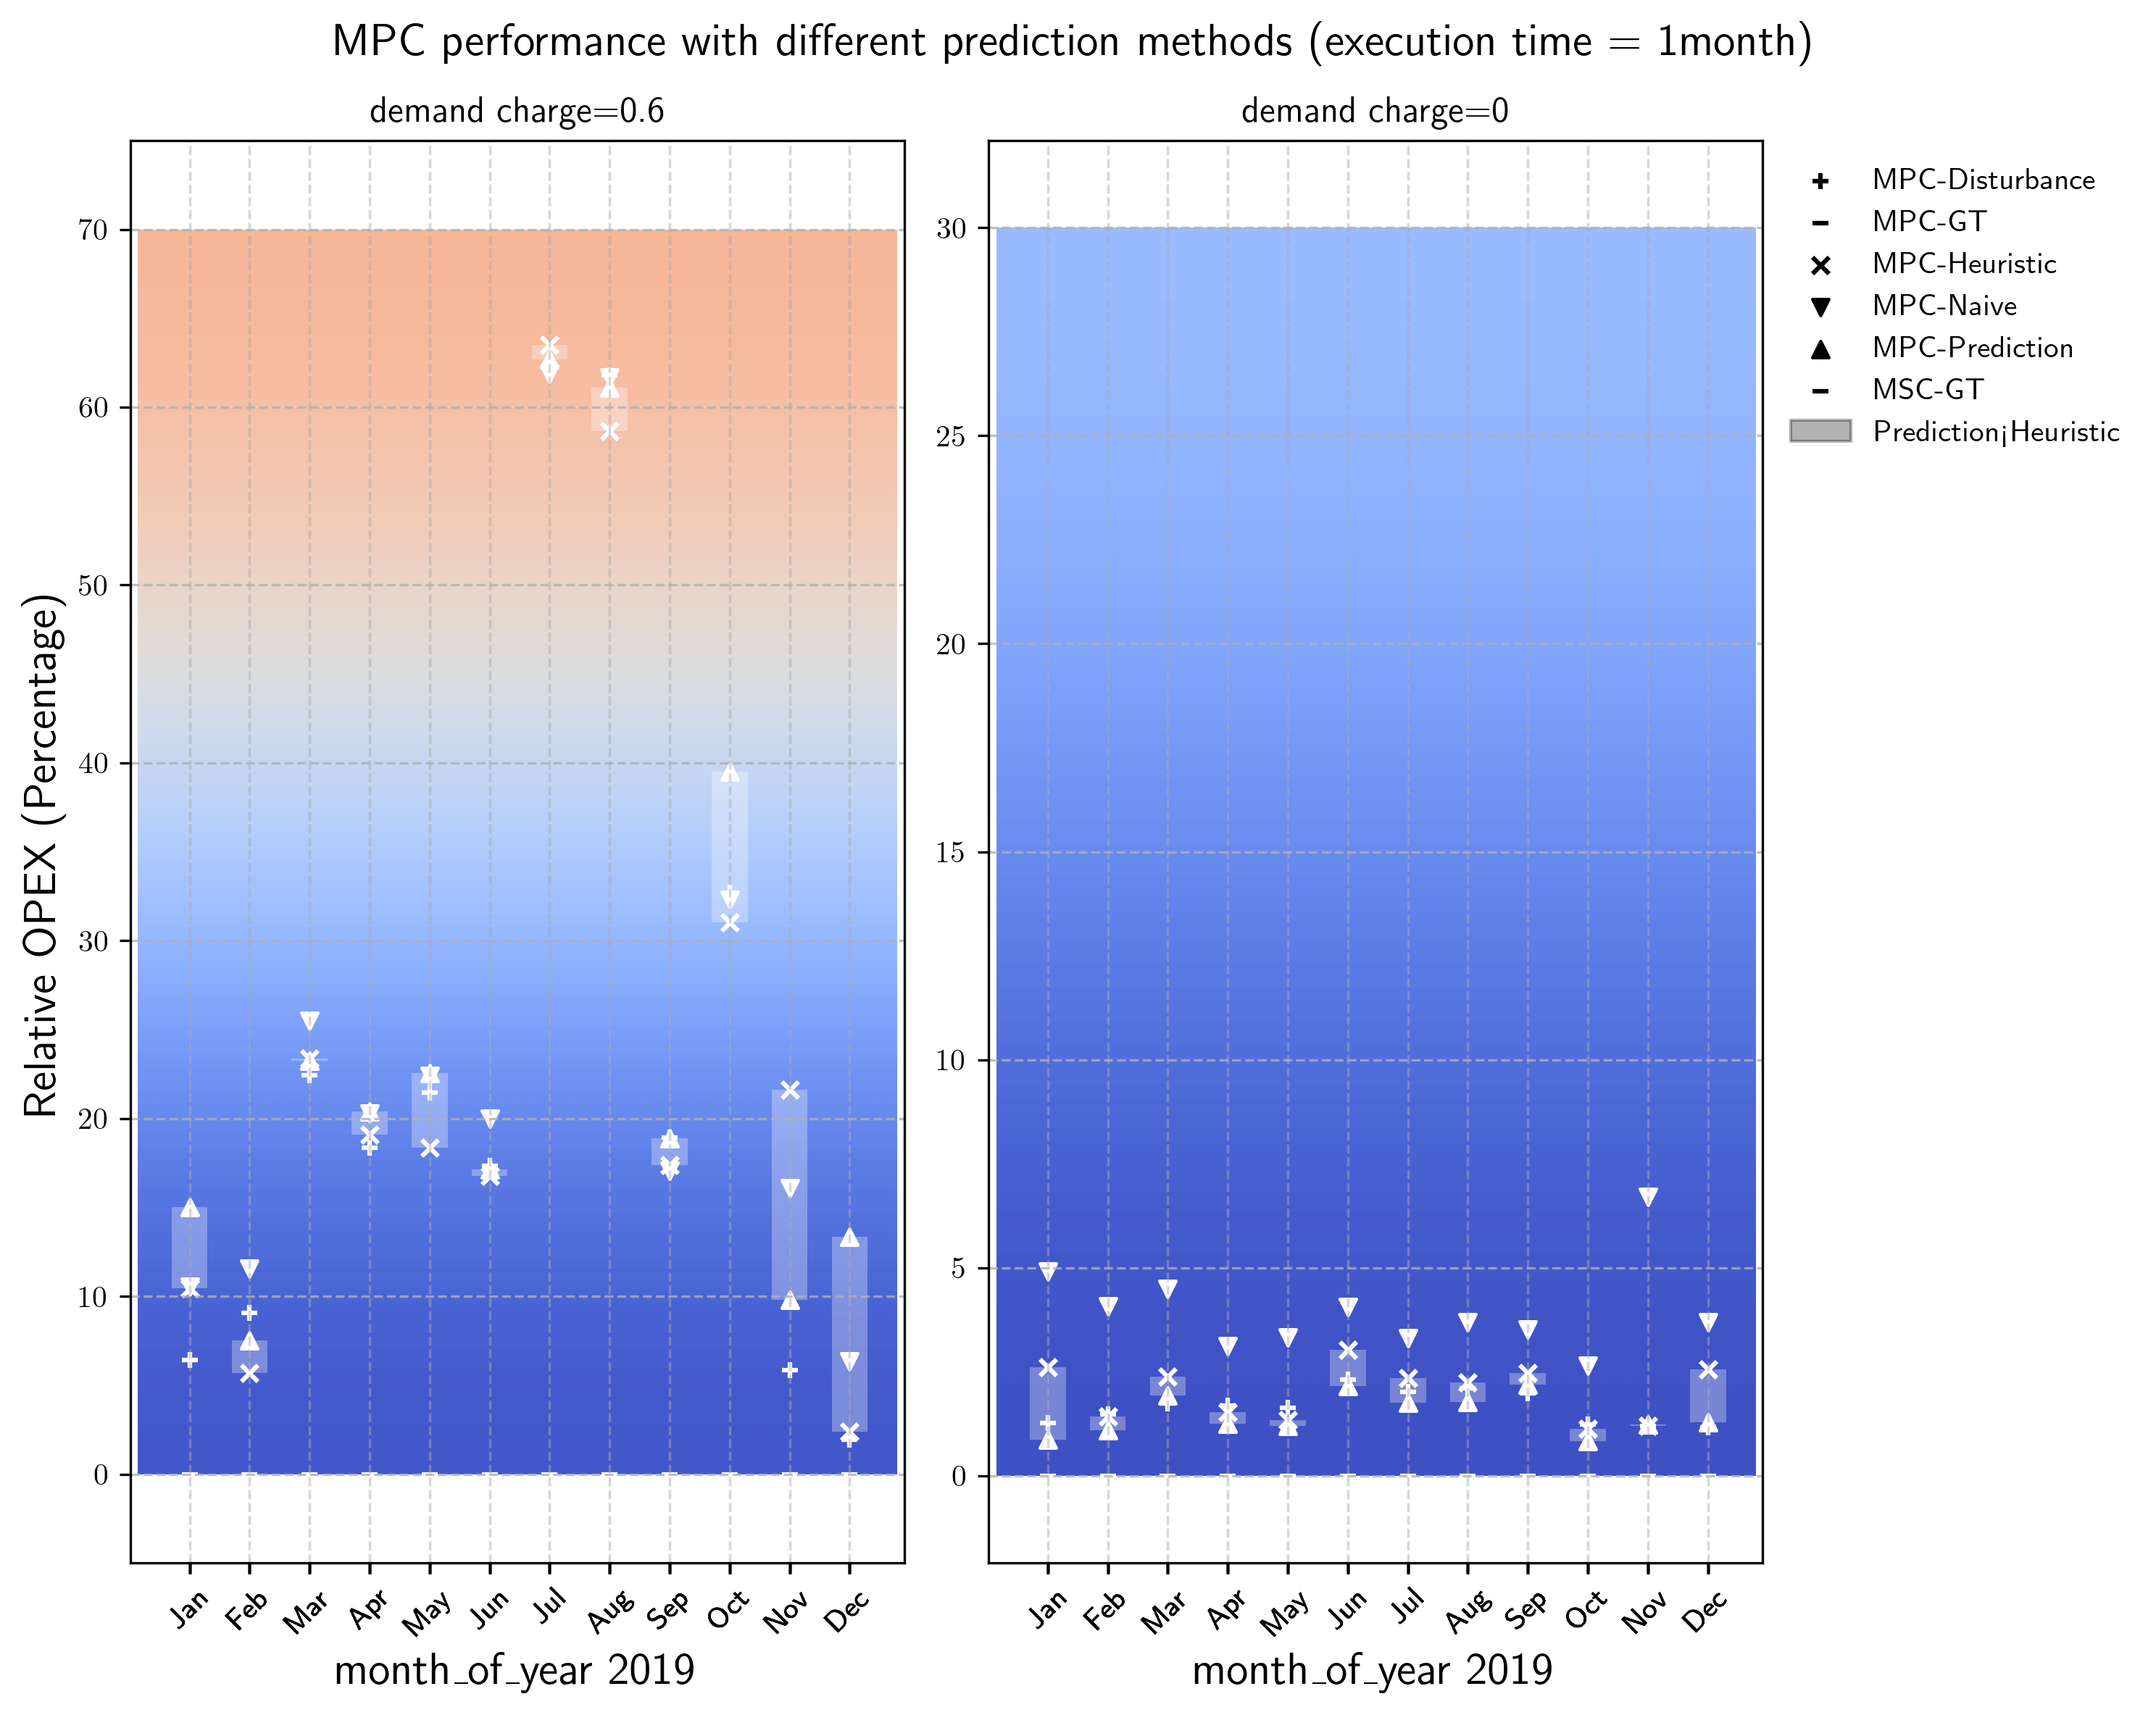

In [6]:
plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[-5,75],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[-2.1,32.1],
            "show_shadow":False,
            "gradient":True,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":True,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":False,
    "show_line":False,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex-gradient.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)

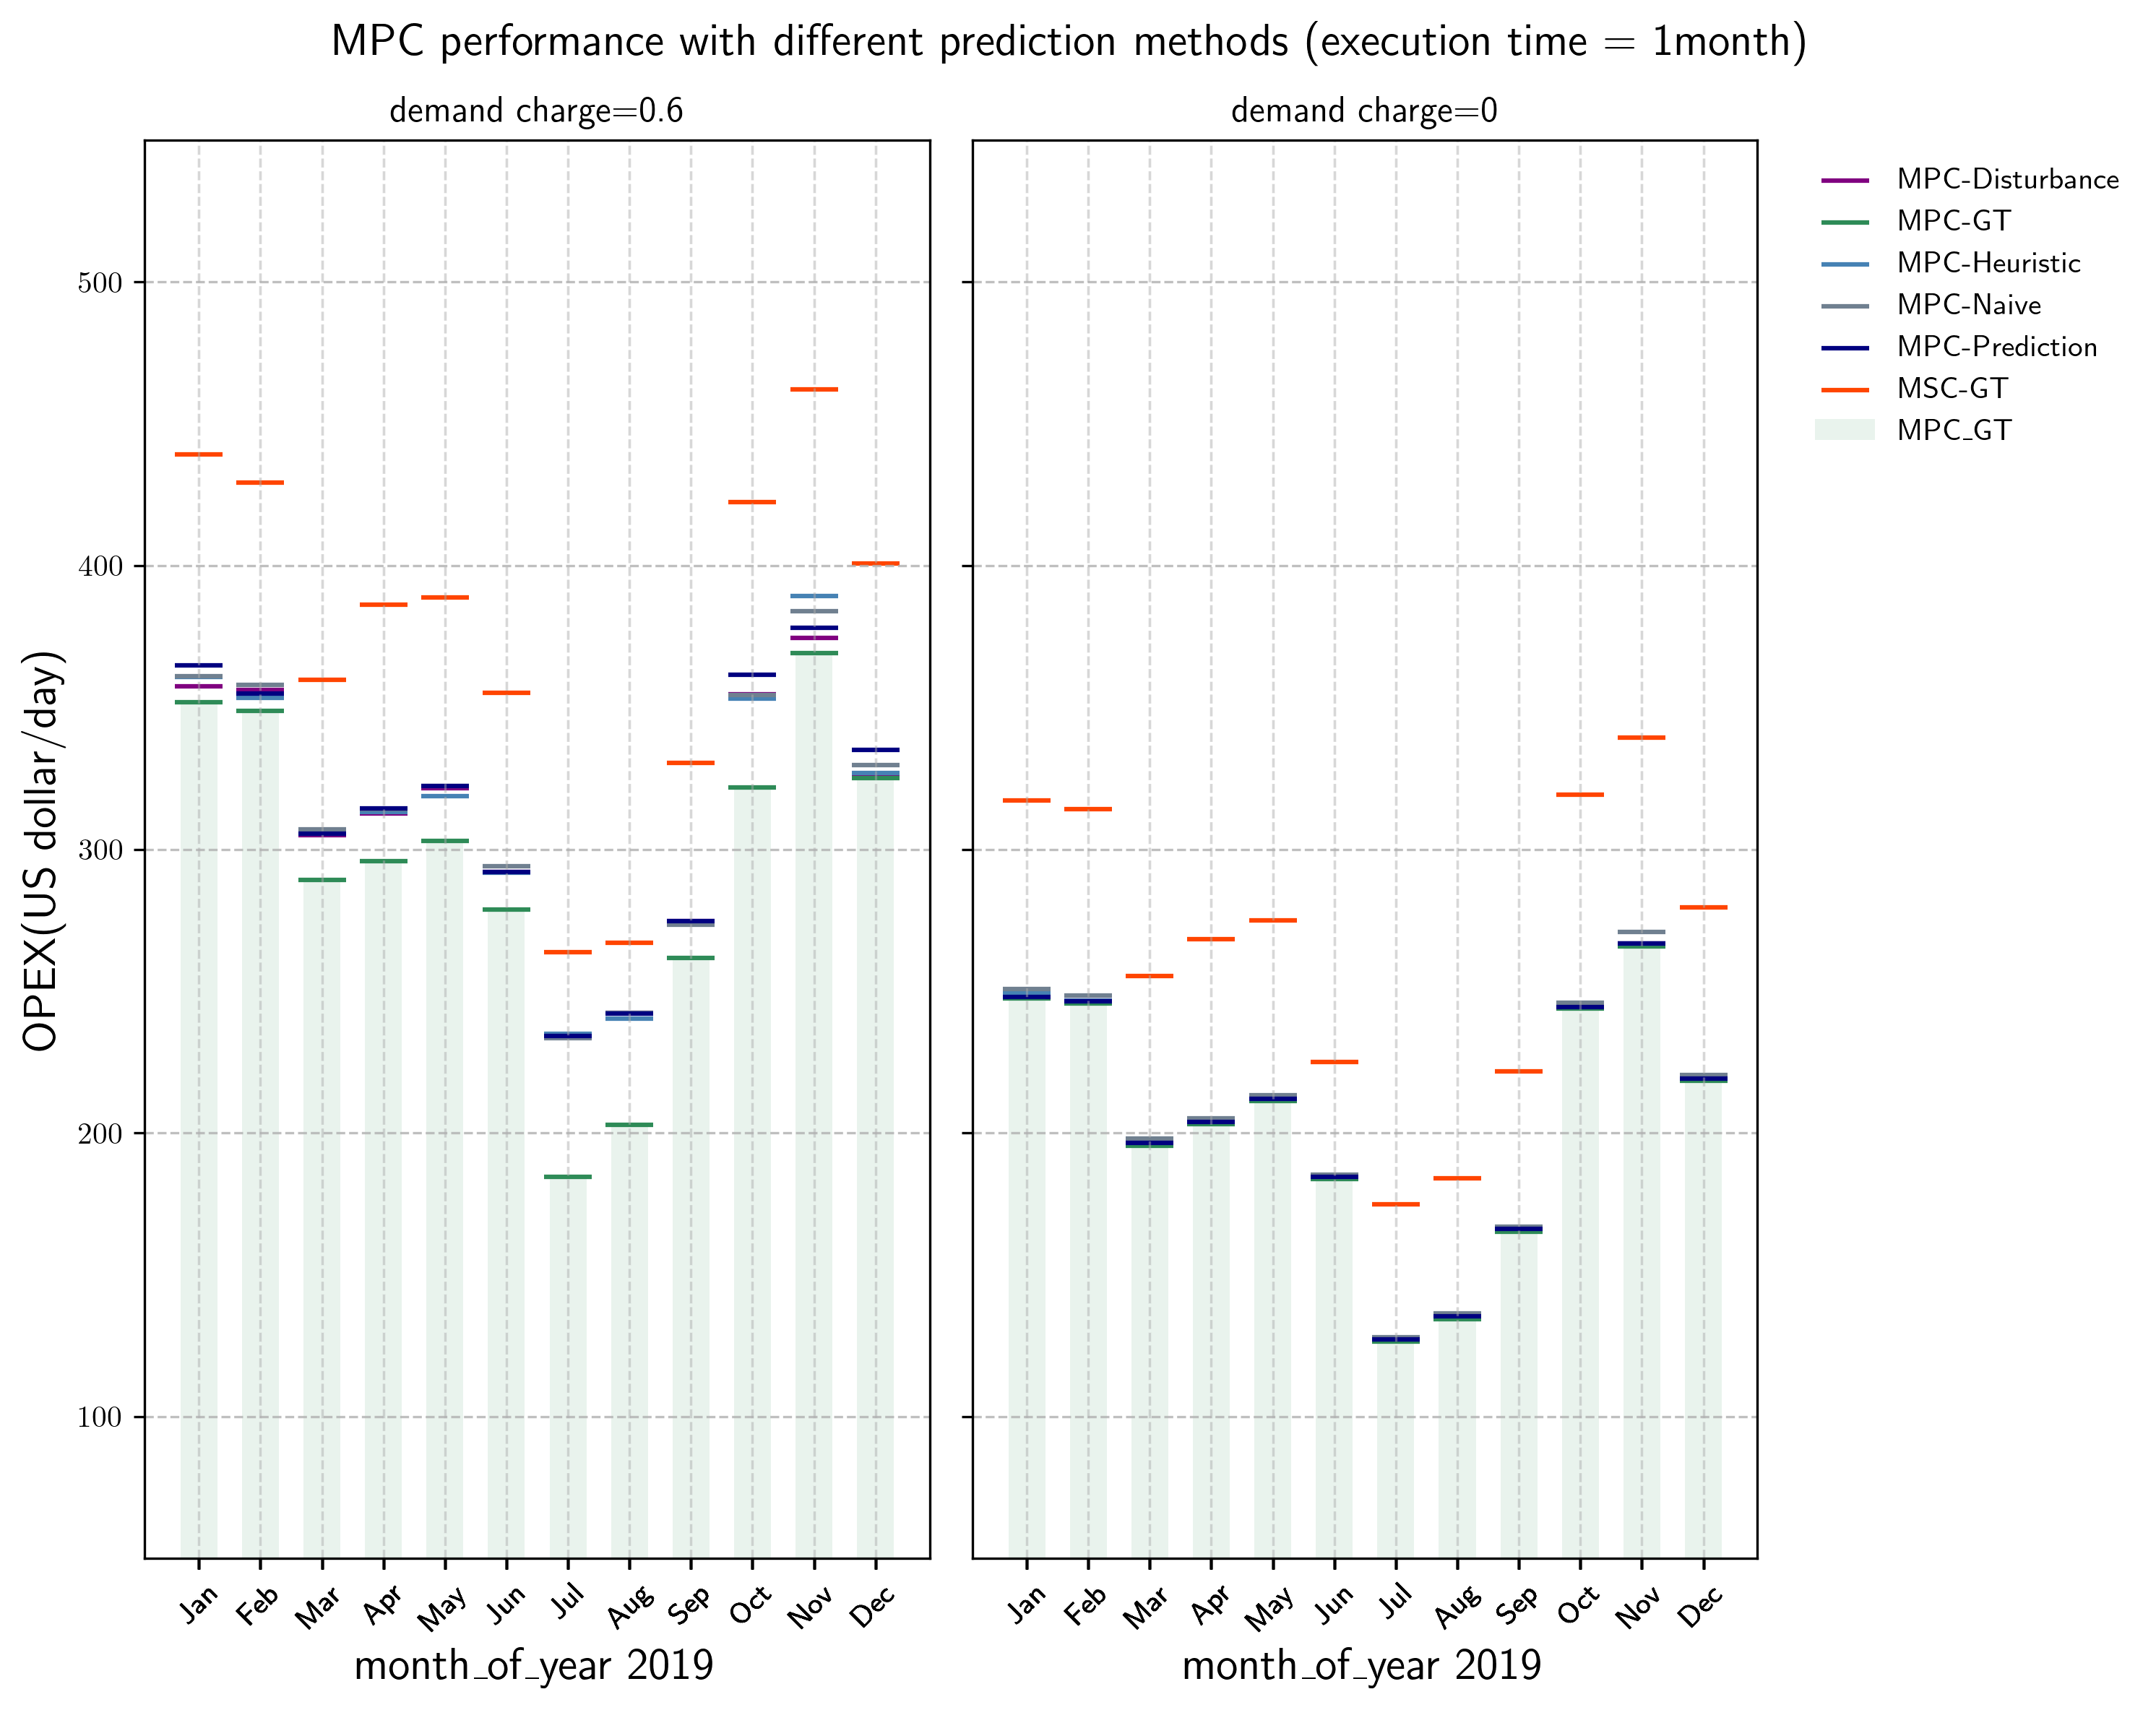

In [4]:
plot_params={
    "subplots":{
        "0":{
            "df":df_opex_6dc,           
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0.6",
            "limit":[50,550],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.7],
                "alpha":1
                }
            },
        "1":{
            "df":df_opex_0dc,
            "key":"OPEX",
            "duration_key":"month_of_year",
            "subtitle":"demand charge=0",
            "limit":[50,550],
            "show_shadow":False,
            "gradient":False,
            "gradient_params":{
                "cmap_name":"coolwarm",
                "cmap_range":[0,0.3],
                "alpha":1
                }
            },
    },
    "relative":False,
    "fontsize":10,
    "n_subplots":2,
    "figsize":(10,8),
    "show_notes":False,
    "marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic1-6h-bat-12months-0.6&0dc-relative-opex-notrelative.png',
    "suptitle":"MPC performance with different prediction methods (execution time = 1month)"
}

r_opex_month_6dc=mplot_origin_valid_bar(plot_params)

# plot for thesis topic 2

In [ ]:
# disturbance methods:
#   uniform (error distributed evenly of negative and positive)
#   uniform_neg (all pred-ground_truth<0)
#   uniform_pos (all pred-ground_truth>0)
#   normal, normal_neg, normal_pos follow similar rules

A. period = 1 month

In [26]:
# load_data
path=path_prefix+r"\output\experiments\thesis_topic2\6h-bat-6months-disturbance-type.xlsx"
df_dist_type=pd.read_excel(path)

valid_df=df_dist_type[df_dist_type["status"]=='D']
valid_df.reset_index(inplace=True)

# filter data
start, end="03-01", "04-01"
df_march=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

start, end="06-01", "07-01"
df_june=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

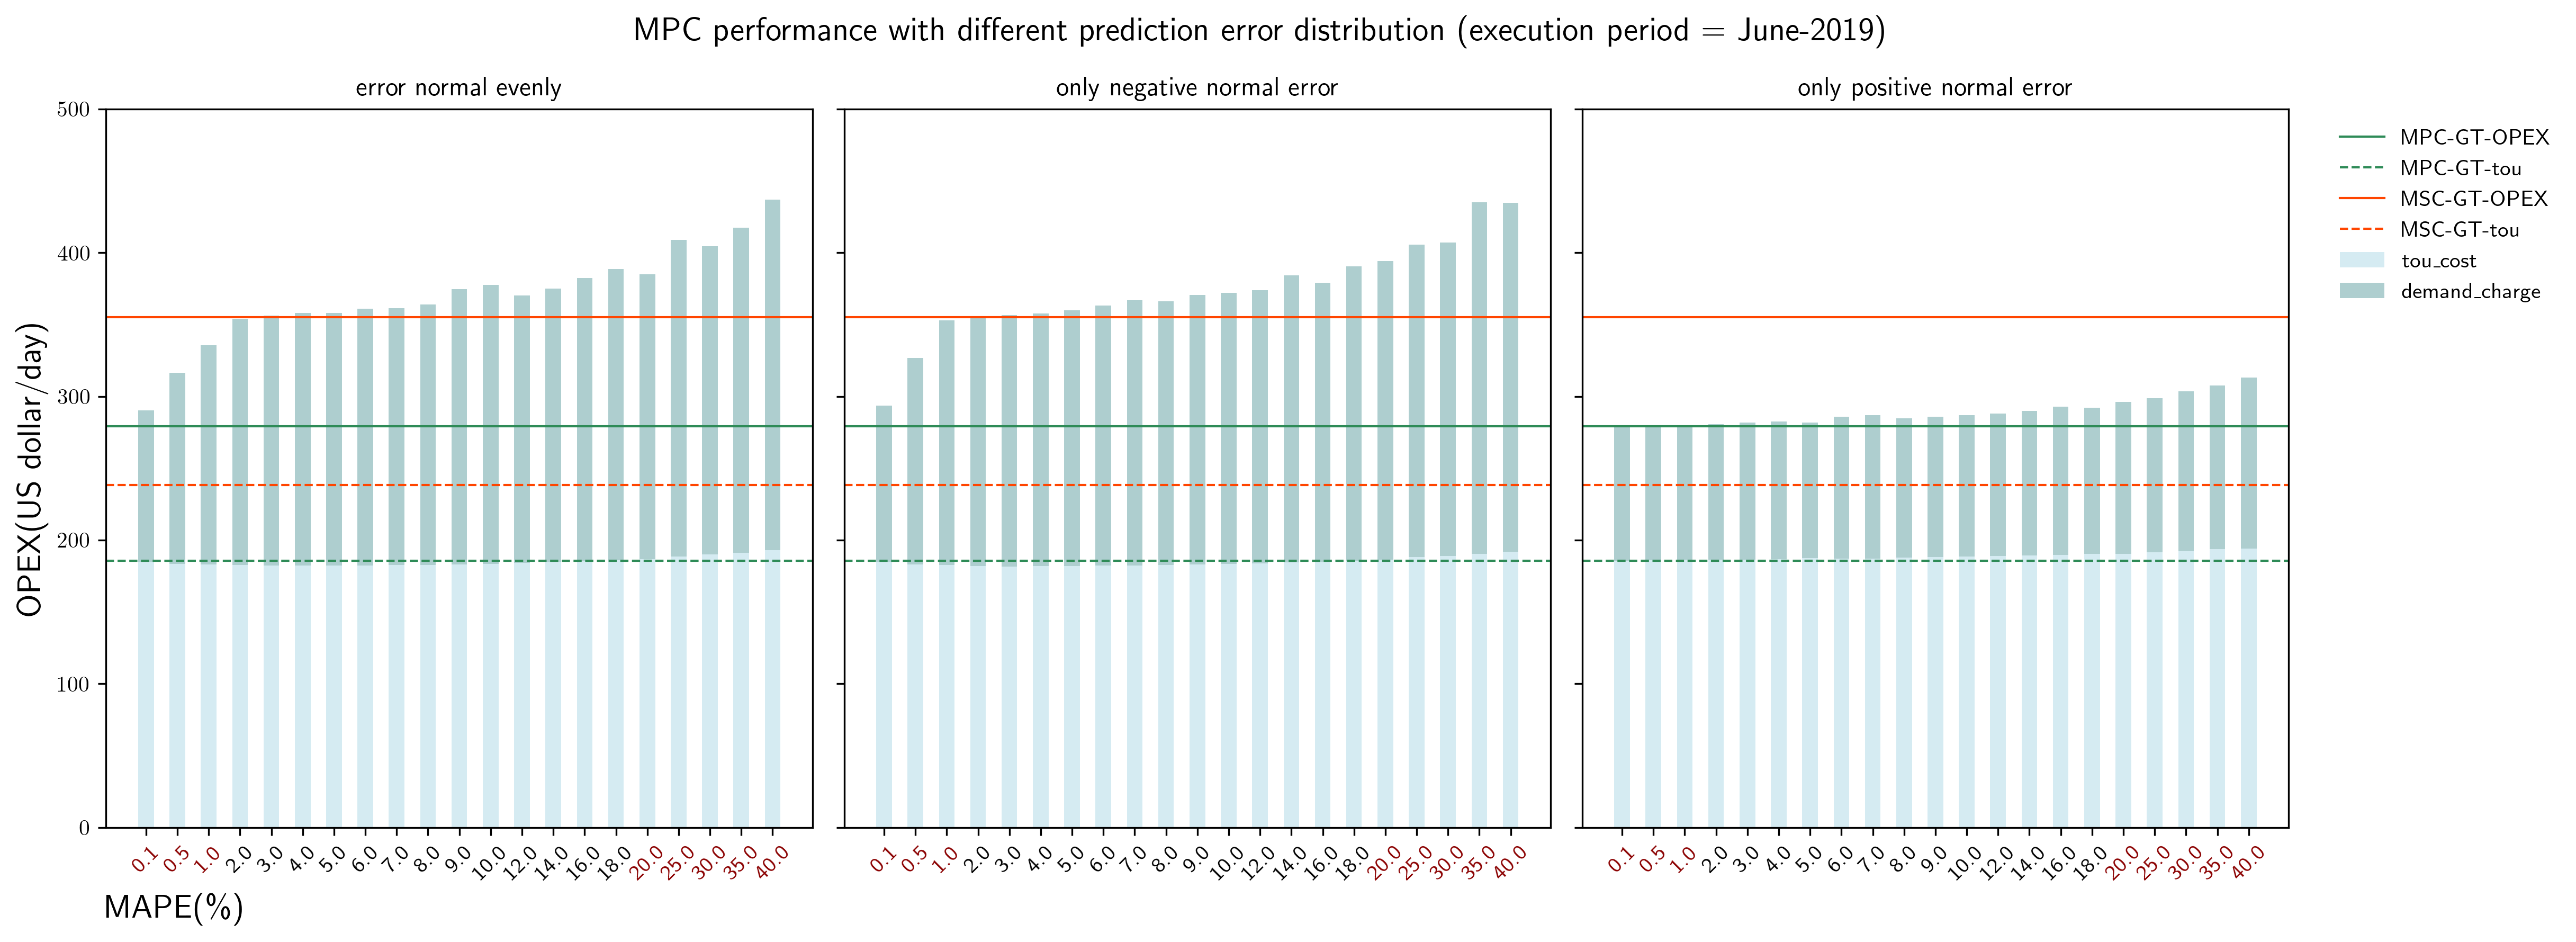

In [3]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"normal",
            "subtitle":"error normal evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"normal_neg",
            "subtitle":"only negative normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"normal_pos",
            "subtitle":"only positive normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_june,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-june-normal.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = June-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

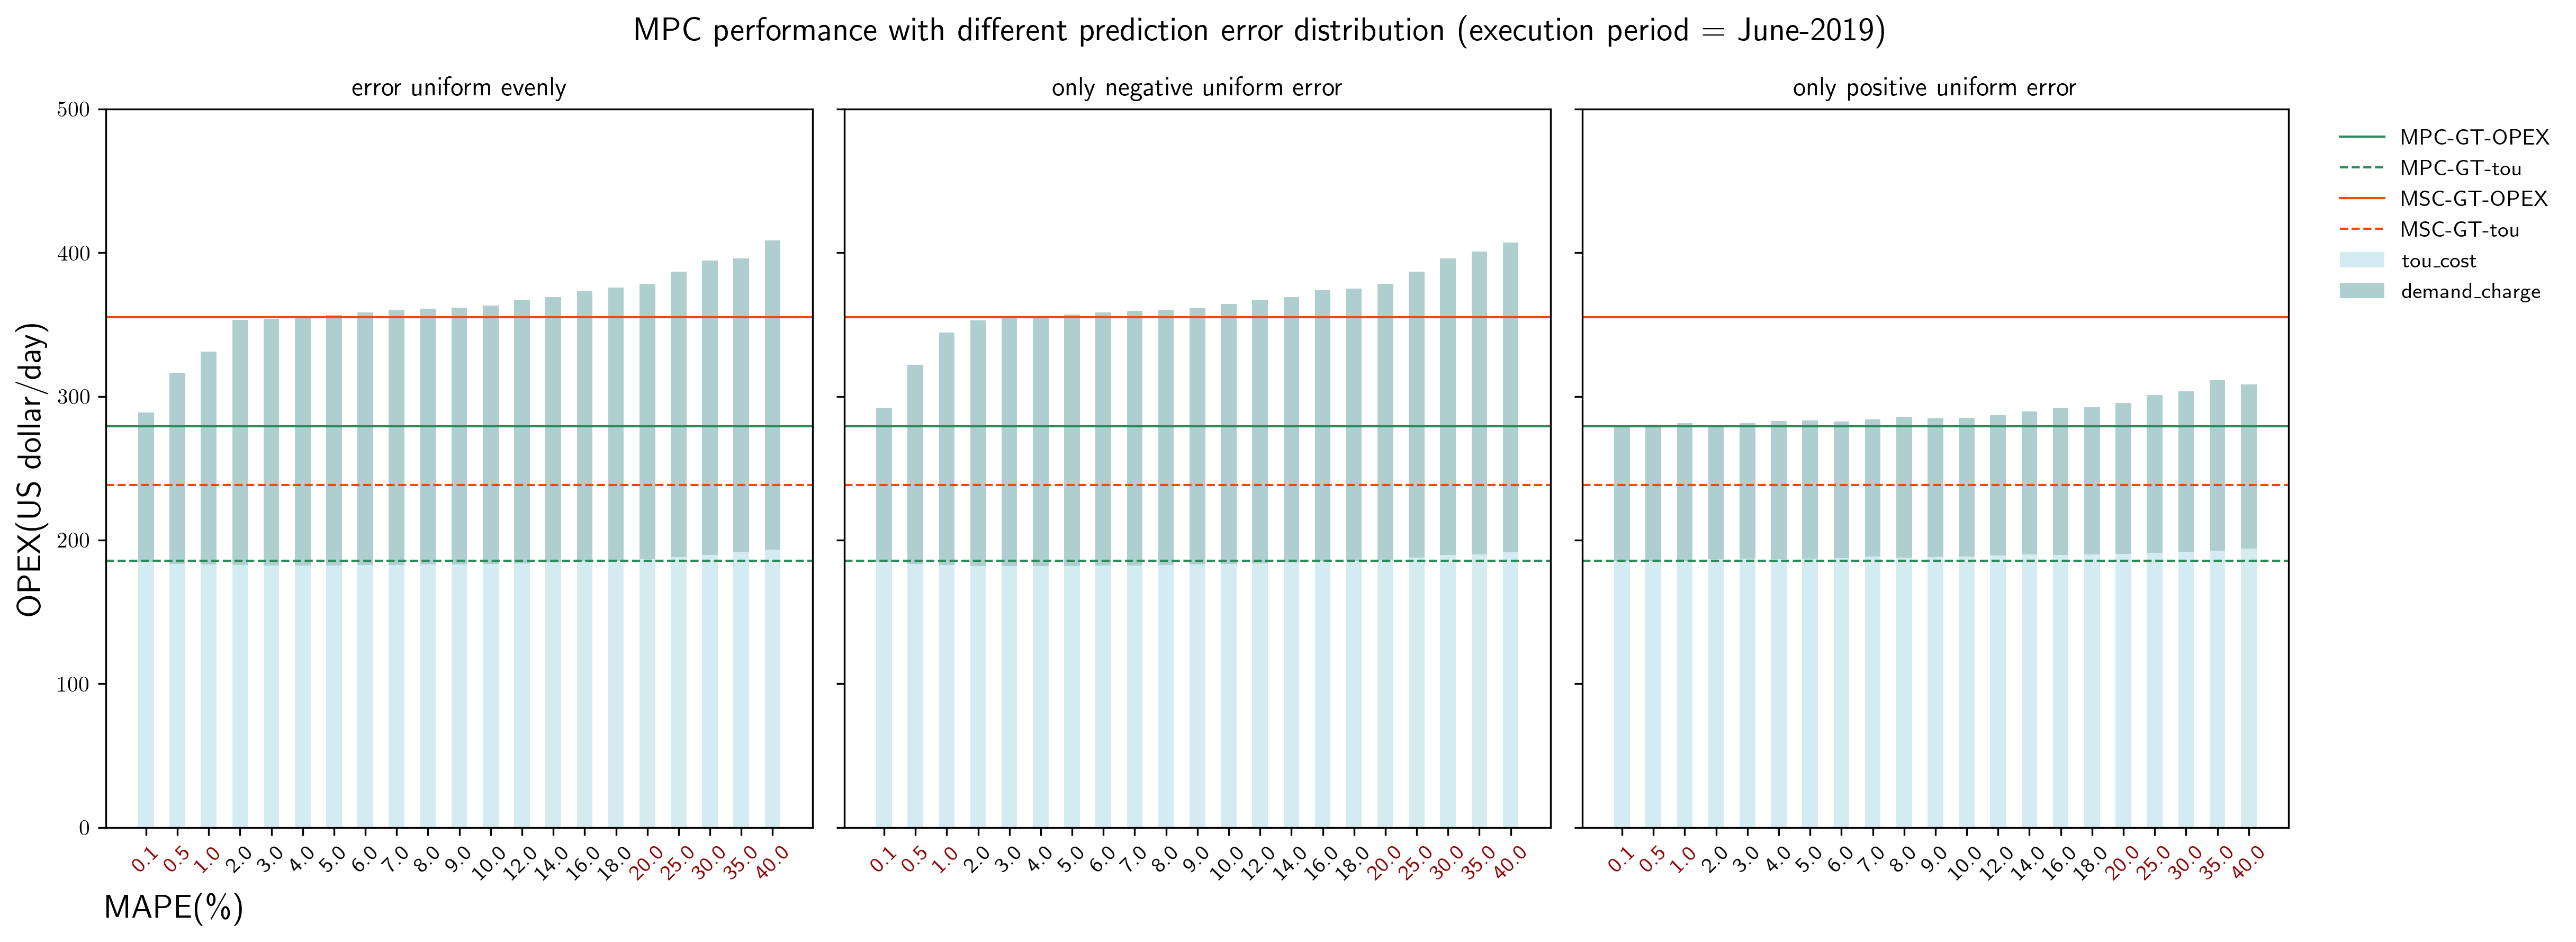

In [5]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"uniform",
            "subtitle":"error uniform evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"uniform_neg",
            "subtitle":"only negative uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"uniform_pos",
            "subtitle":"only positive uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_june,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-june-uniform.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = June-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

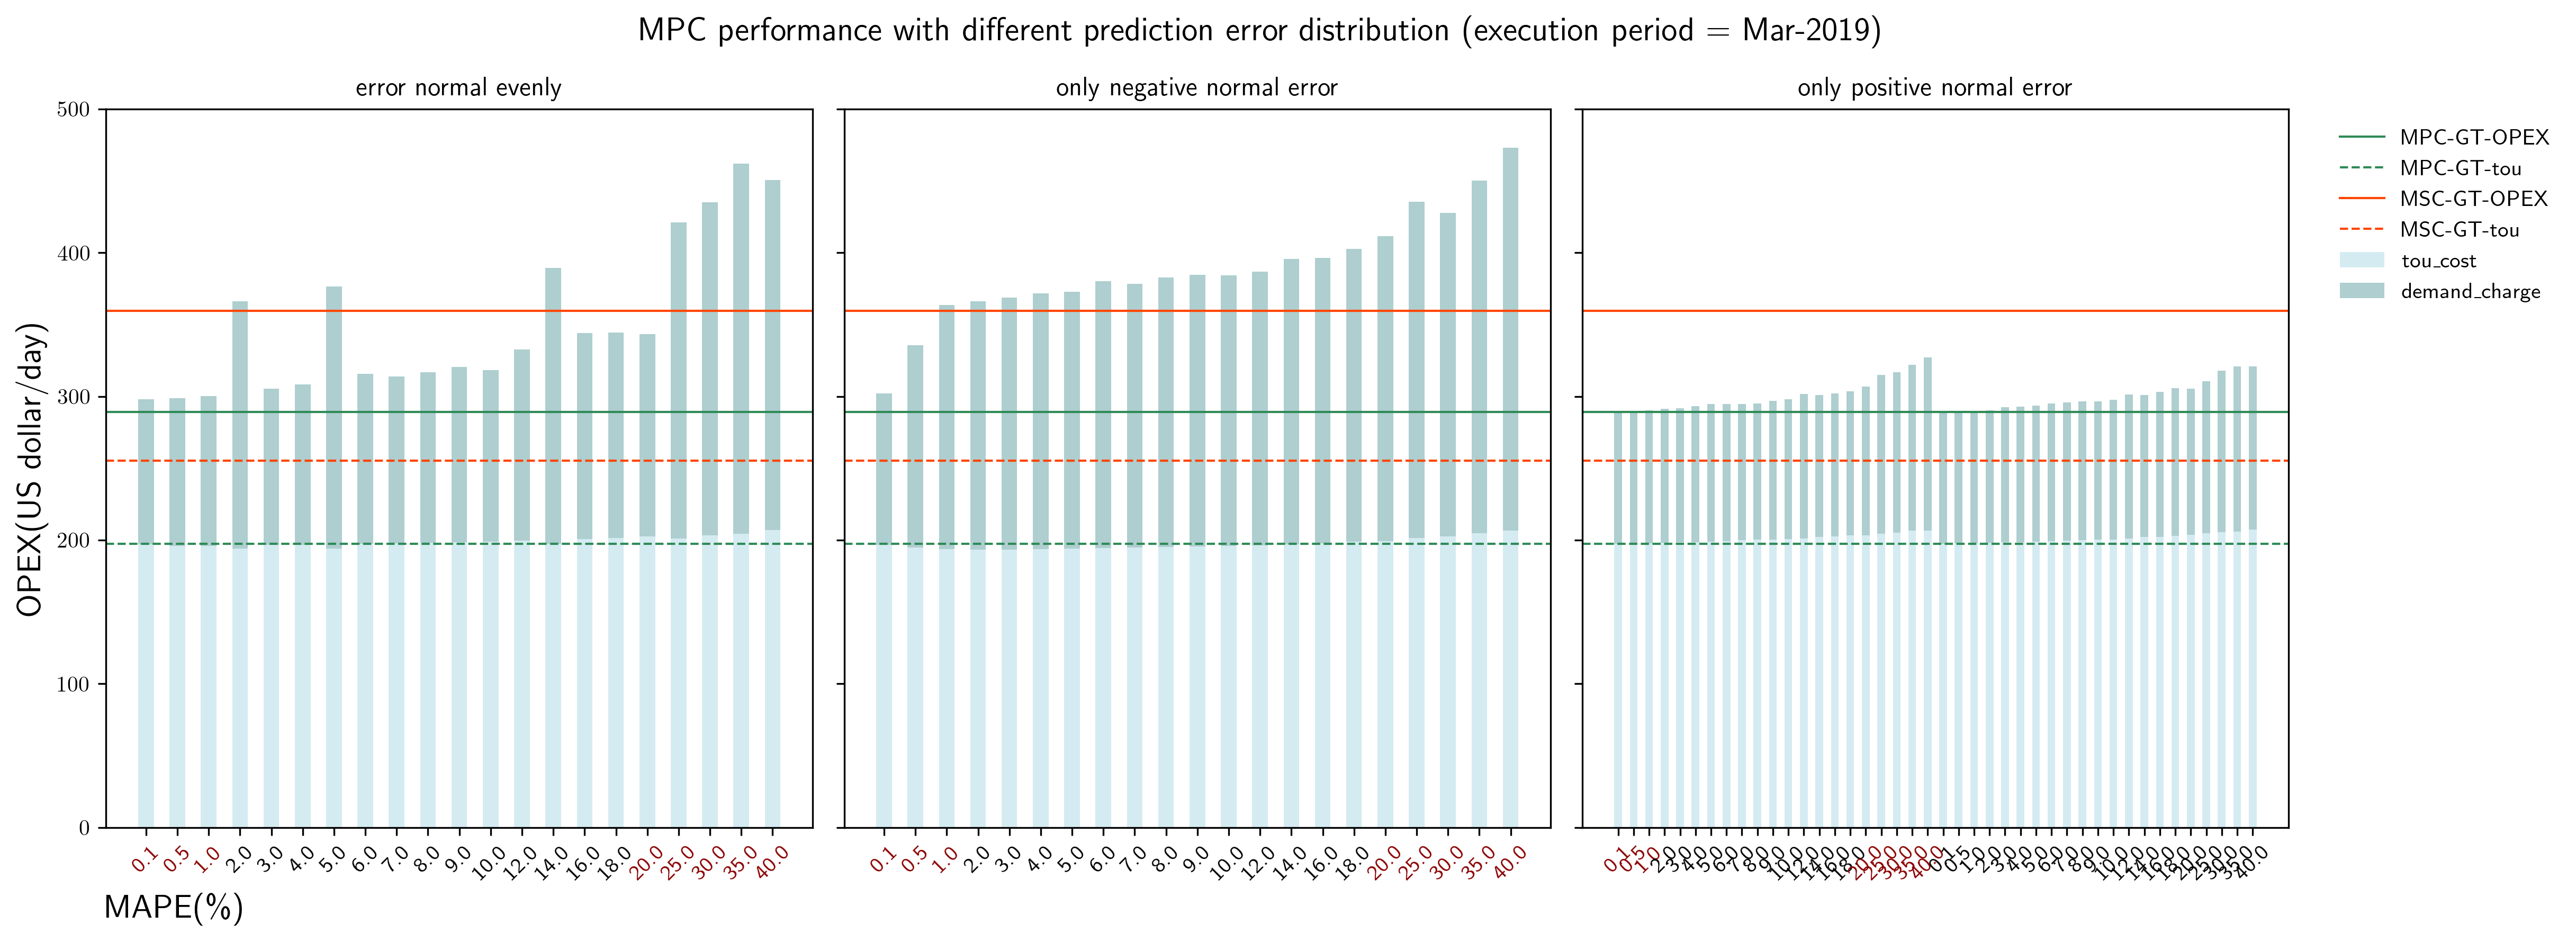

In [27]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"normal",
            "subtitle":"error normal evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"normal_neg",
            "subtitle":"only negative normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"normal_pos",
            "subtitle":"only positive normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_march,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-march-normal.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = Mar-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

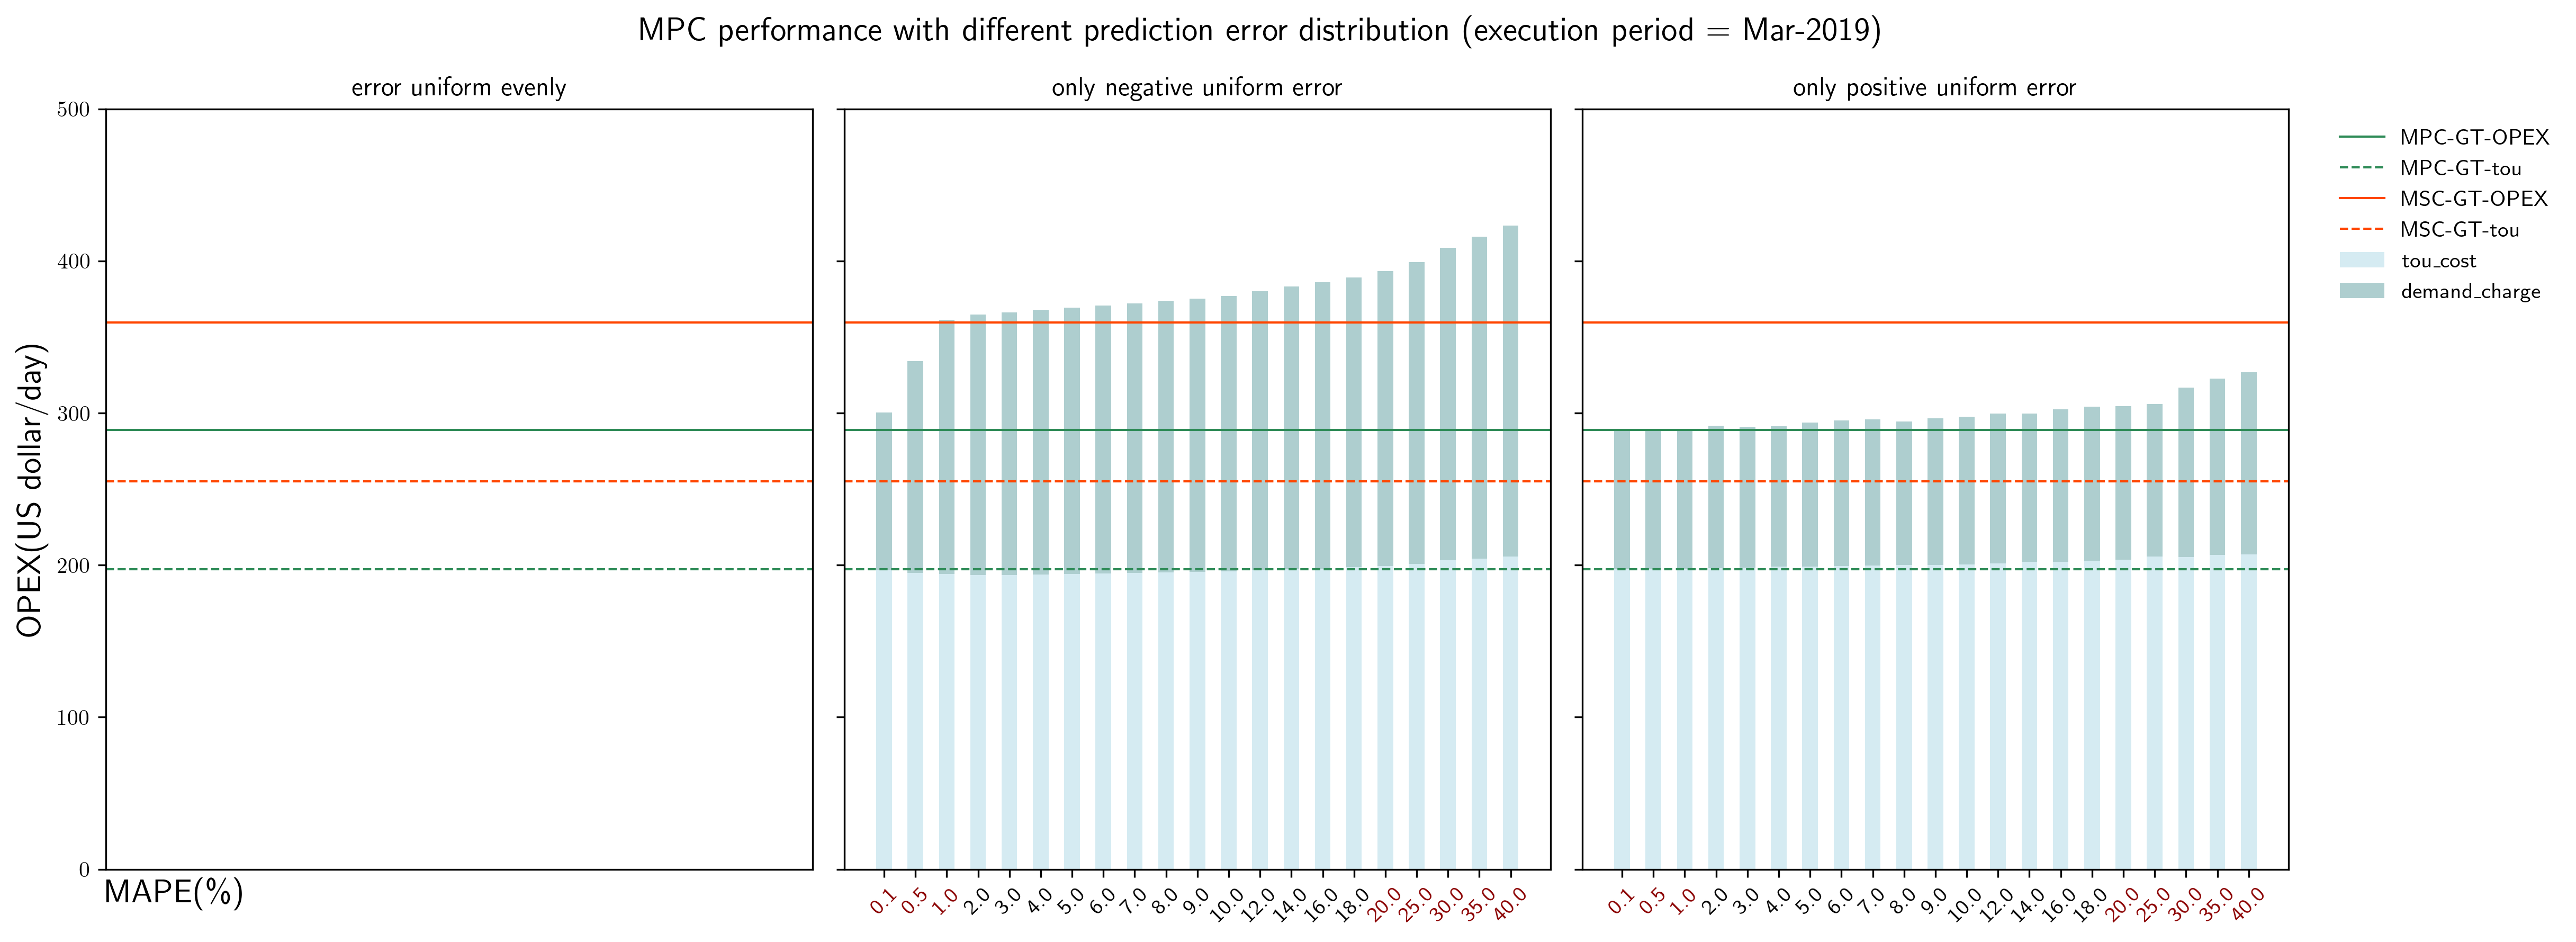

In [28]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"uniform",
            "subtitle":"error uniform evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"uniform_neg",
            "subtitle":"only negative uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"uniform_pos",
            "subtitle":"only positive uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_march,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-march-uniform.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = Mar-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

B. period = 1 week

In [20]:
# load_data
path=path_prefix+r"\output\experiments\thesis_topic2\6h-bat-6weeks-disturbance-type.xlsx"
df_dist_type=pd.read_excel(path)

valid_df=df_dist_type[df_dist_type["status"]=='D']
valid_df.reset_index(inplace=True)

# filter data
start, end="03-04", "03-11"
df_march_week1=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

start, end="06-03", "06-10"
df_june_week1=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

In [21]:
df_june_week1

,index,id,status,bld,pv,ev,method,strategy,B_kWh,pred_model,...,grid_export,import_cost,export_revenue,grid_max,bat_e_terminal,bat_e_terminal_revenue,load_bld_error_max_neg,load_bld_error_max_pos,load_pv_error_max_neg,load_pv_error_max_pos
128,128,129,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,15.839619,256.960704,2.729140,154.762680,0.000000e+00,0.000000e+00,-0.193612,0.000000,0,0
129,129,130,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,18.196764,256.431286,3.022664,158.597210,0.000000e+00,0.000000e+00,-0.998300,0.000000,0,0
130,130,131,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,21.096836,257.460439,3.374993,156.929848,0.000000e+00,0.000000e+00,-1.996601,0.000000,0,0
131,131,132,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,25.609185,258.327884,3.927830,157.674842,0.000000e+00,0.000000e+00,-3.874411,0.000000,0,0
132,132,133,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,31.433564,259.277250,4.617640,158.986419,3.552714e-15,6.024259e-16,-5.936445,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,252,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,140.352960,270.224849,18.236653,330.863395,1.776357e-15,3.012129e-16,-61.022921,59.451369,0,0
252,252,253,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,148.425829,272.403721,18.520002,348.937625,0.000000e+00,0.000000e+00,-71.193408,67.458625,0,0
253,253,254,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,165.054632,275.162787,20.914625,357.620623,0.000000e+00,0.000000e+00,-78.566860,76.141623,0,0
254,254,255,D,Sum,Sum,ALL,MPC,optimal,438,GT,...,15.534805,257.115391,2.706714,153.777274,0.000000e+00,0.000000e+00,0.000000,0.000000,0,0


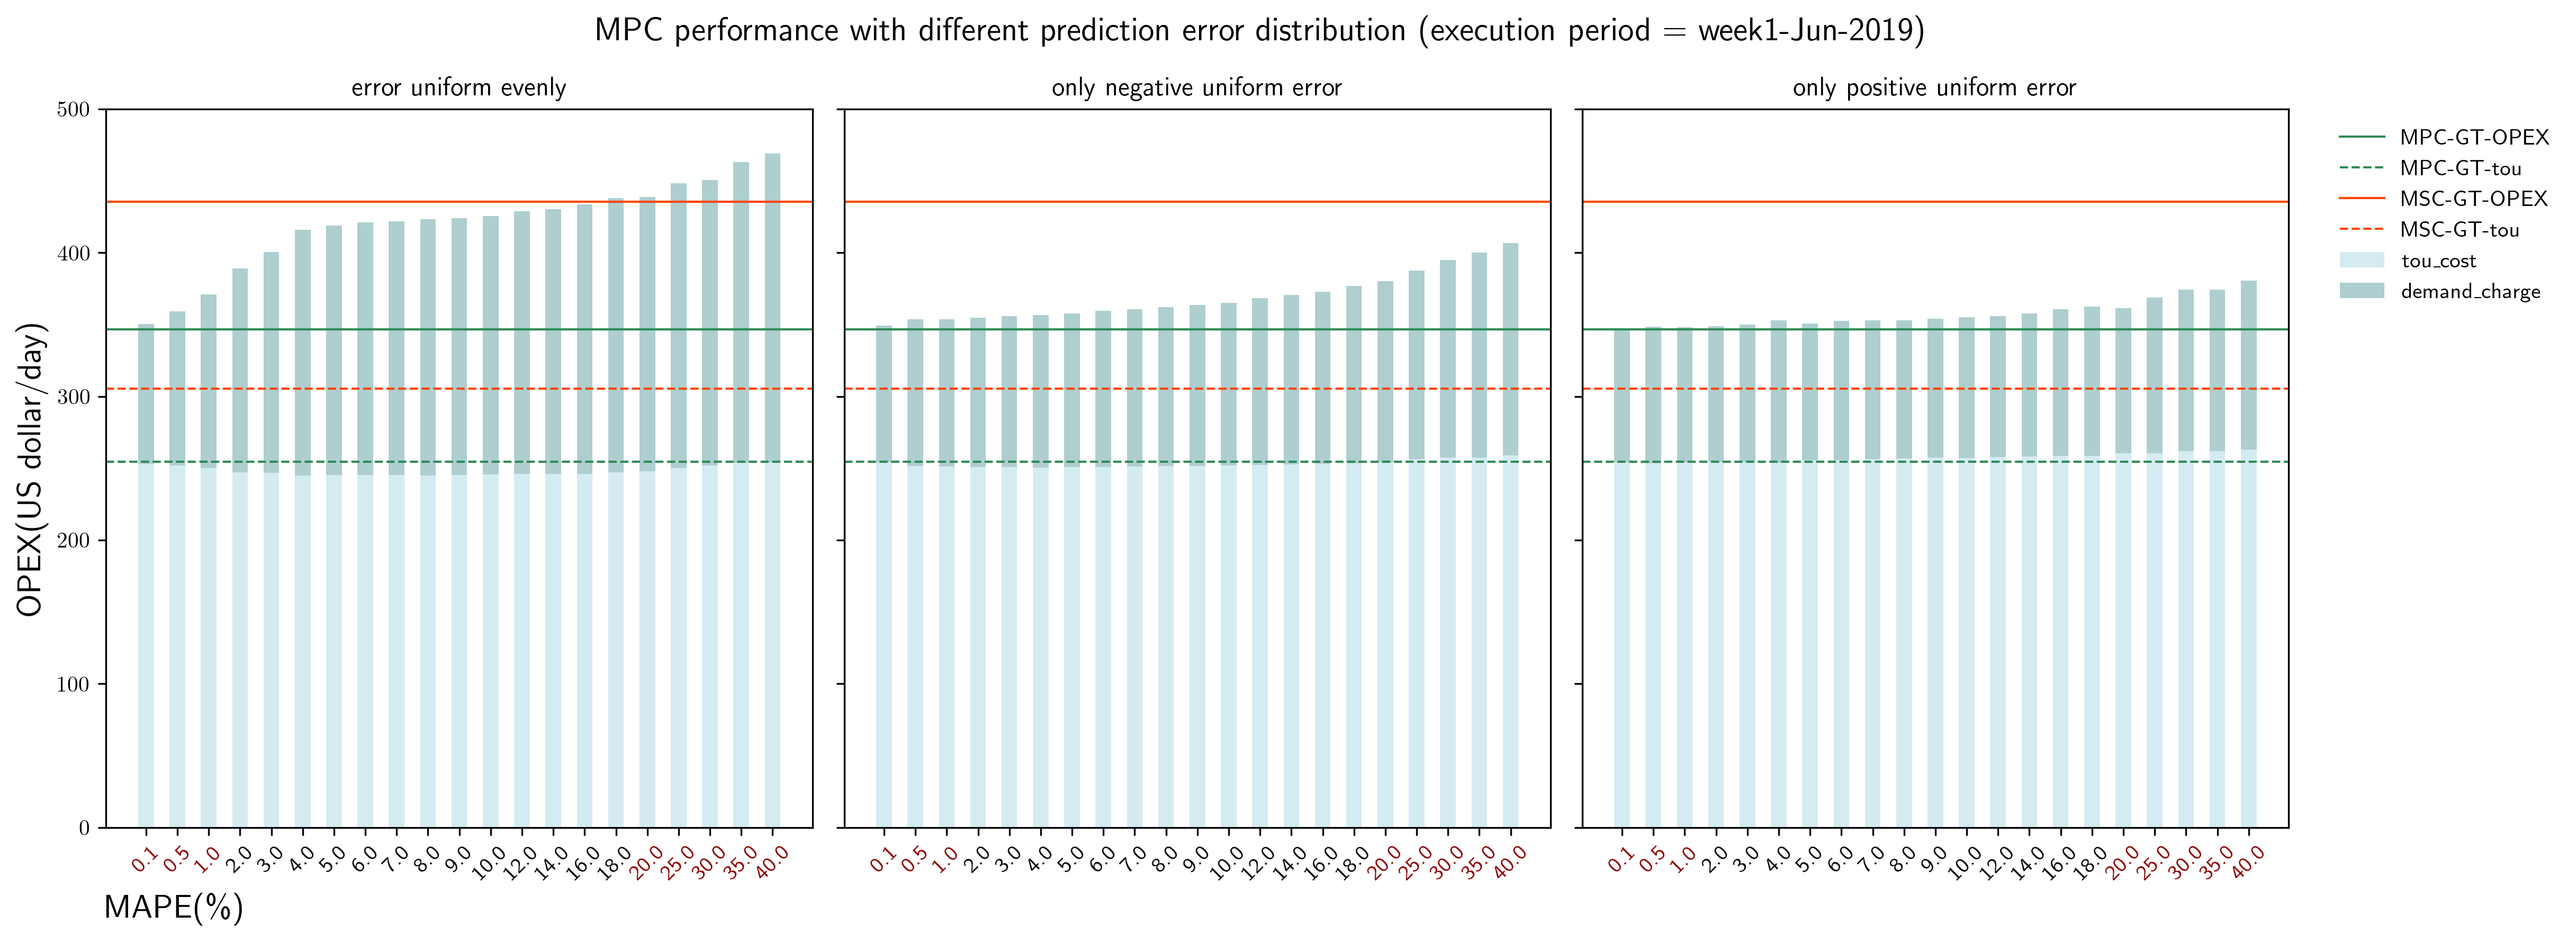

In [22]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"uniform",
            "subtitle":"error uniform evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"uniform_neg",
            "subtitle":"only negative uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"uniform_pos",
            "subtitle":"only positive uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_june_week1,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-week1-june-uniform.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = week1-Jun-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

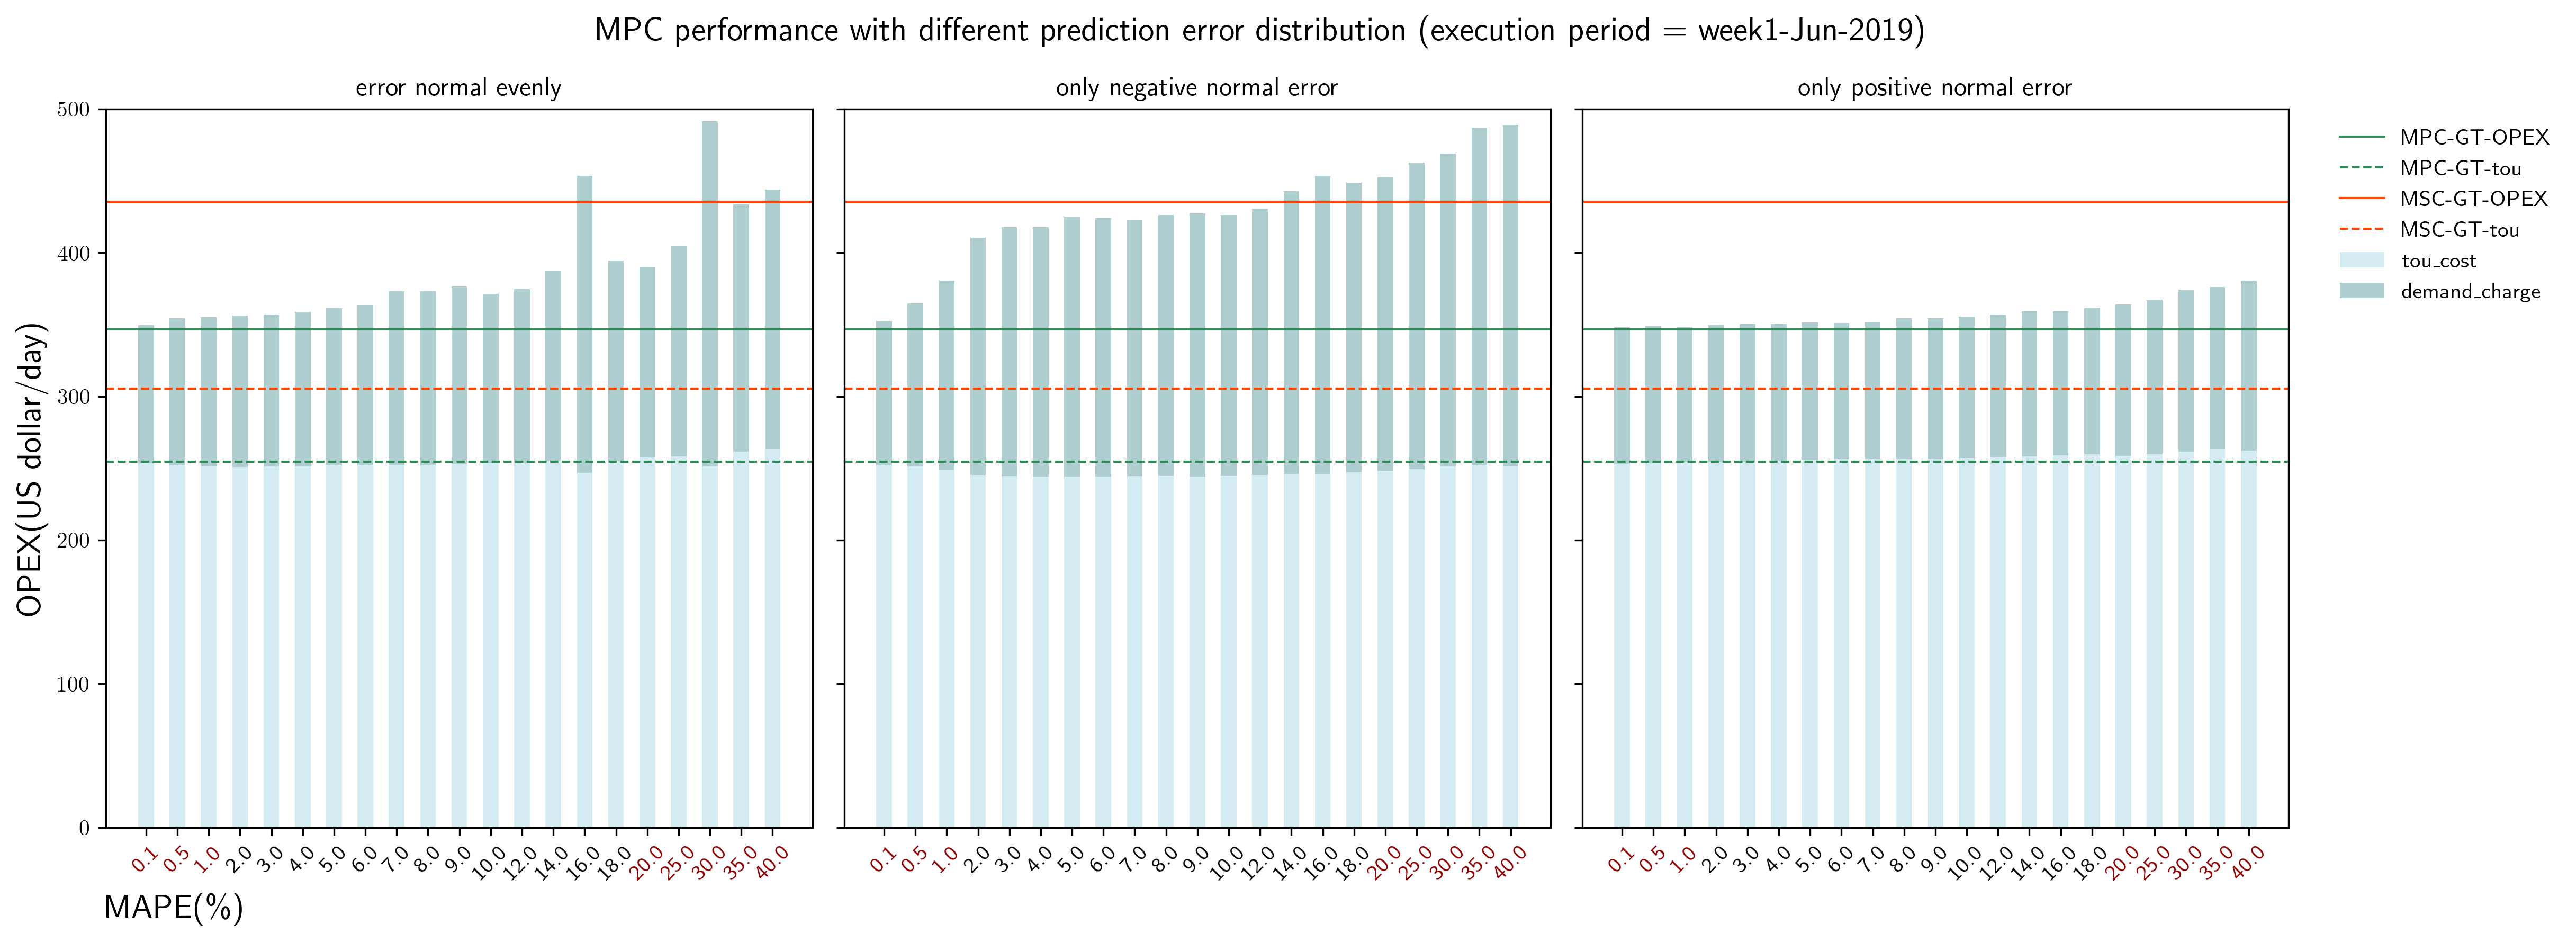

In [24]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"normal",
            "subtitle":"error normal evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"normal_neg",
            "subtitle":"only negative normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"normal_pos",
            "subtitle":"only positive normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_june_week1,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-week1-june-normal.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = week1-Jun-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

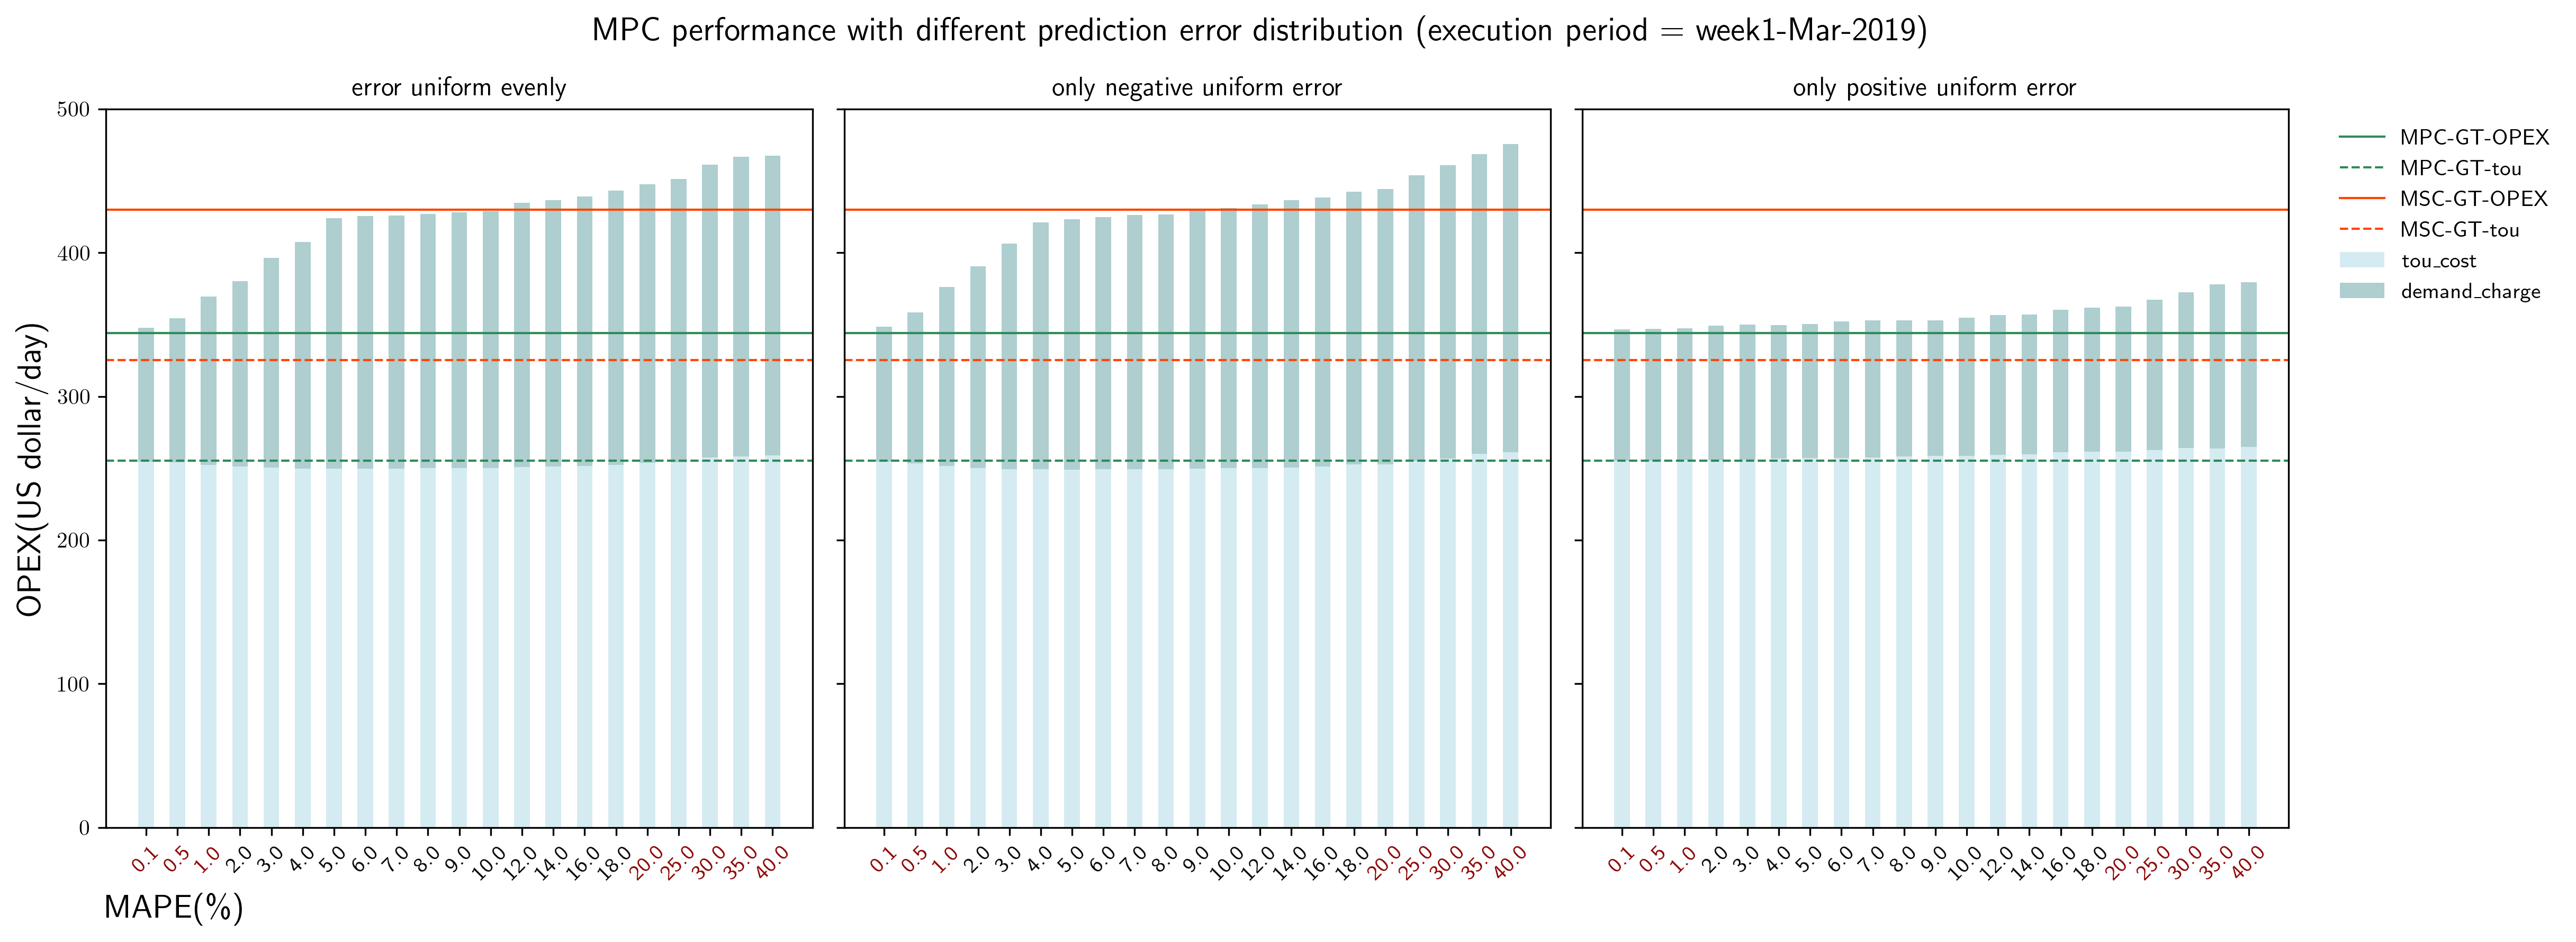

In [23]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"uniform",
            "subtitle":"error uniform evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"uniform_neg",
            "subtitle":"only negative uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"uniform_pos",
            "subtitle":"only positive uniform error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_march_week1,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-week1-march-uniform.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = week1-Mar-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

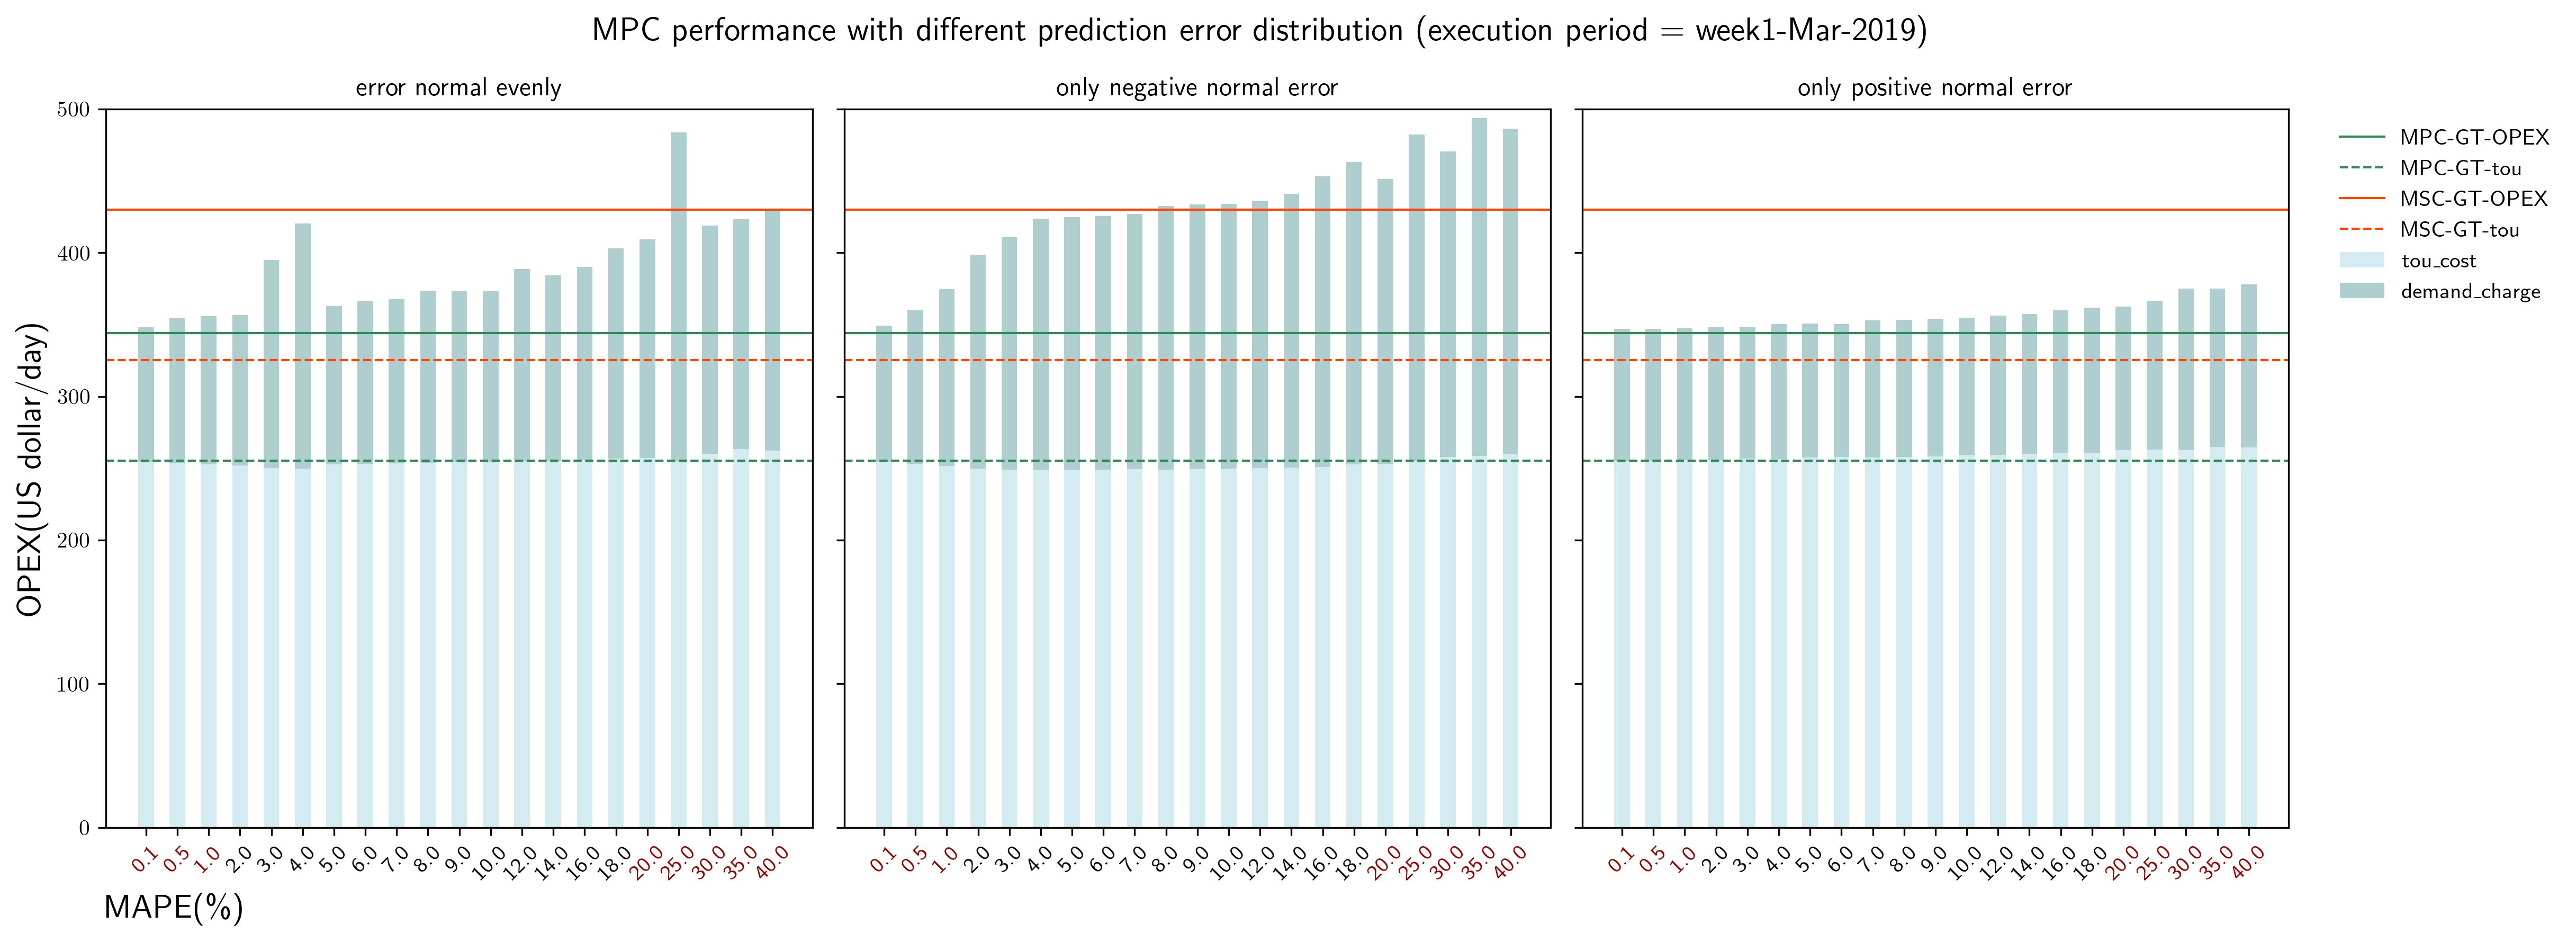

In [25]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"normal",
            "subtitle":"error normal evenly",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "1":{
            "key":"OPEX",
            "method":"normal_neg",
            "subtitle":"only negative normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"normal_pos",
            "subtitle":"only positive normal error",
            "limit":[0,500],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"disturbance_rule",
    "df":df_march_week1,   
    'bbox_to_anchor':(1.4,1),
    "relative":False,
    "fontsize":10,
    "n_subplots":3,
    "figsize":(16,6),
    "show_notes":False,
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic2-6h-bat-month-disturbance-typr-week1-march-normal.png',
    "suptitle":"MPC performance with different prediction error distribution (execution period = week1-Mar-2019)"
}

r_opex_month_6dc=mplot_disturbance_type(plot_params)

# plot for thesis topic 3

In [ ]:
# redefine optimization process methods:
#   minimize
#   minimize_cap
#   zero

A. period = 1 week

In [6]:
# load_data
path=path_prefix+r"\output\experiments\thesis_topic3\6h-bat-6weeks-disturbance-type2-del-dup.xlsx"
df_method=pd.read_excel(path)

valid_df=df_method[df_method["status"]=='D']
valid_df.reset_index(inplace=True)

'''
# filter error scale
valid_df_=valid_df.loc[valid_df["disturbance_scale"].isin([0.02,0.04,0.06,0.08,0.1])]
valid_df_ref=valid_df.loc[valid_df["pred_model"].isin(['GT'])]
valid_df=pd.concat([valid_df_,valid_df_ref])
'''

# filter data
start, end="03-04", "03-11"
df_march_week1=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

start, end="06-03", "06-10"
df_june_week1=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

In [7]:
valid_df

,index,id,status,bld,pv,ev,method,strategy,B_kWh,pred_model,...,grid_export,import_cost,export_revenue,grid_max,bat_e_terminal,bat_e_terminal_revenue,load_bld_error_max_neg,load_bld_error_max_pos,load_pv_error_max_neg,load_pv_error_max_pos
0,3,4,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,5.625749,263.645376,0.823373,157.927203,35.877283,6.083632,-5.975166,6.617019,0.0,0.0
1,5,6,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,9.743098,264.504180,1.409229,163.881970,28.198466,4.781552,-13.471543,12.072948,0.0,0.0
2,7,8,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,17.820869,266.307049,2.668340,170.508492,41.675041,7.066745,-19.583895,19.257381,0.0,0.0
3,9,10,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,19.425792,266.979579,2.747435,176.794978,31.629036,5.363266,-28.040856,25.237701,0.0,0.0
4,11,12,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,29.993557,268.797738,4.247822,182.265392,45.653242,7.741320,-33.658556,40.740814,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1017,1044,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,93.798715,260.442707,12.584740,318.360486,0.000000,0.000000,-39.948068,37.922794,0.0,0.0
526,1018,1045,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,133.308844,268.274247,16.992747,339.300679,0.000000,0.000000,-57.953135,58.616165,0.0,0.0
527,1019,1046,D,Sum,Sum,ALL,MPC,optimal,438,Disturbance,...,160.132663,274.828339,19.784631,358.587677,0.000000,0.000000,-79.088073,77.108677,0.0,0.0
528,1020,1047,D,Sum,Sum,ALL,MPC,optimal,438,GT,...,1.120866,265.248537,0.164095,159.308241,147.378623,24.990670,0.000000,0.000000,0.0,0.0


In [8]:
df_june_week1_normal=df_june_week1.drop(df_june_week1.loc\
    [df_june_week1["disturbance_rule"].isin(\
        ["normal_pos","normal_neg","uniform","uniform_neg","uniform_pos",''])].index).copy()

df_march_week1_normal=df_march_week1.drop(df_march_week1.loc\
    [df_march_week1["disturbance_rule"].isin(\
        ["normal_pos","normal_neg","uniform","uniform_neg","uniform_pos",''])].index).copy()

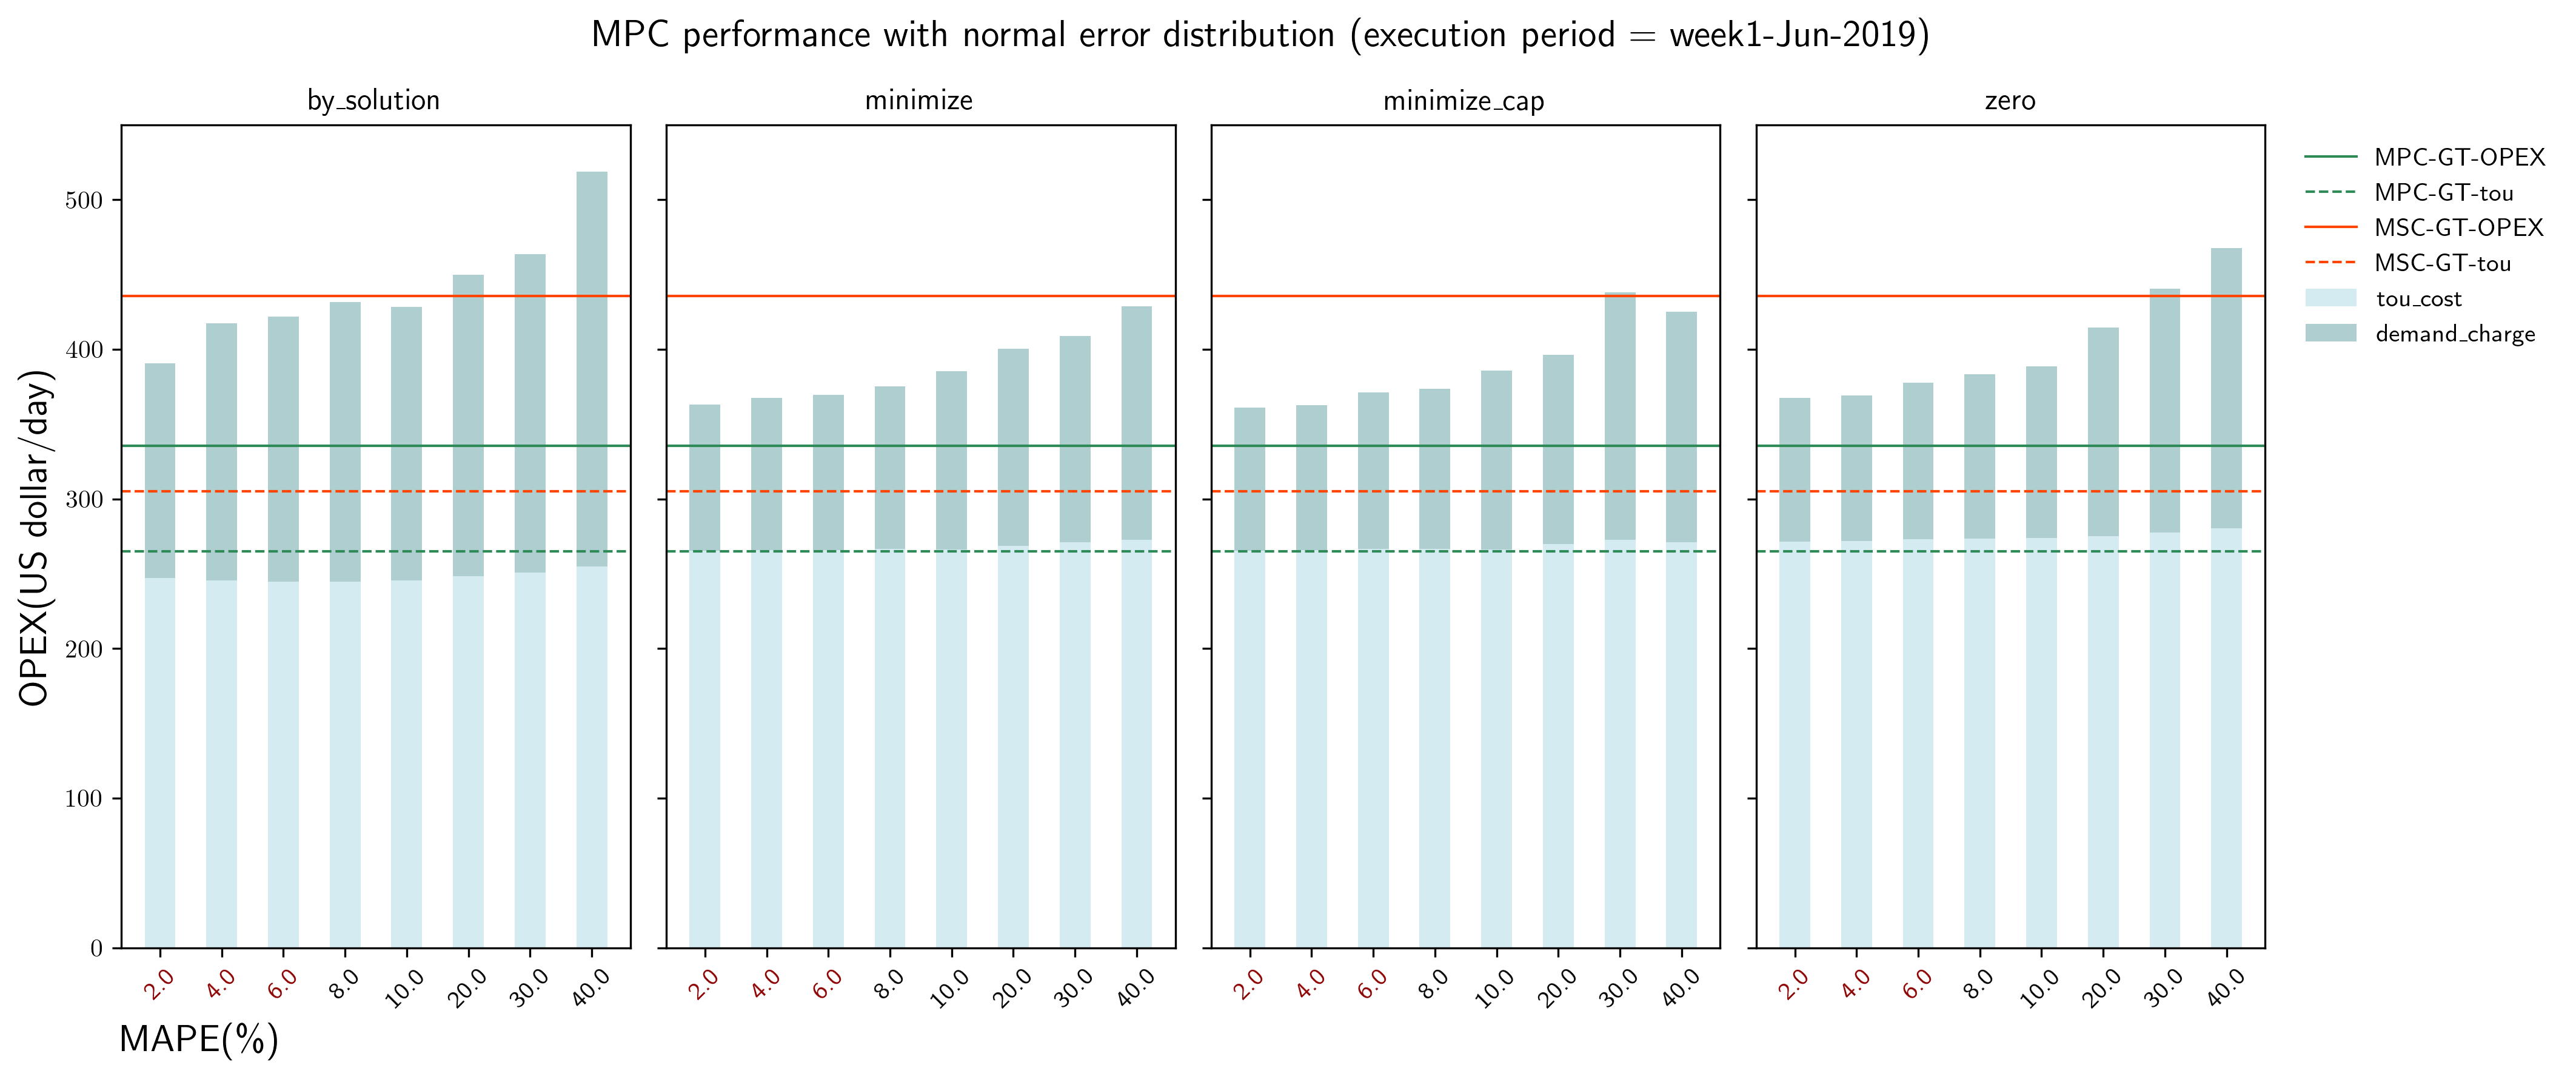

In [9]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"by_solution",
            "subtitle":"by_solution",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "1":{       
            "key":"OPEX",
            "method":"minimize",
            "subtitle":"minimize",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            
            "method":"minimize_cap",
            "subtitle":"minimize_cap",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "3":{
            "key":"OPEX",
            "method":"zero",
            "subtitle":"zero",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"p_grid_max_method",
    "df":df_june_week1_normal,  
    'bbox_to_anchor':(1.4,1), 
    "relative":False,
    "fontsize":10,
    "n_subplots":4,
    "figsize":(14,6),
    "show_notes":False,
    "bbox_to_anchor":(1.6,1),
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic3-6h-bat-june-week1-normal.png',
    "suptitle":"MPC performance with normal error distribution (execution period = week1-Jun-2019)"
}
r_opex_month_6dc=mplot_disturbance_type(plot_params)

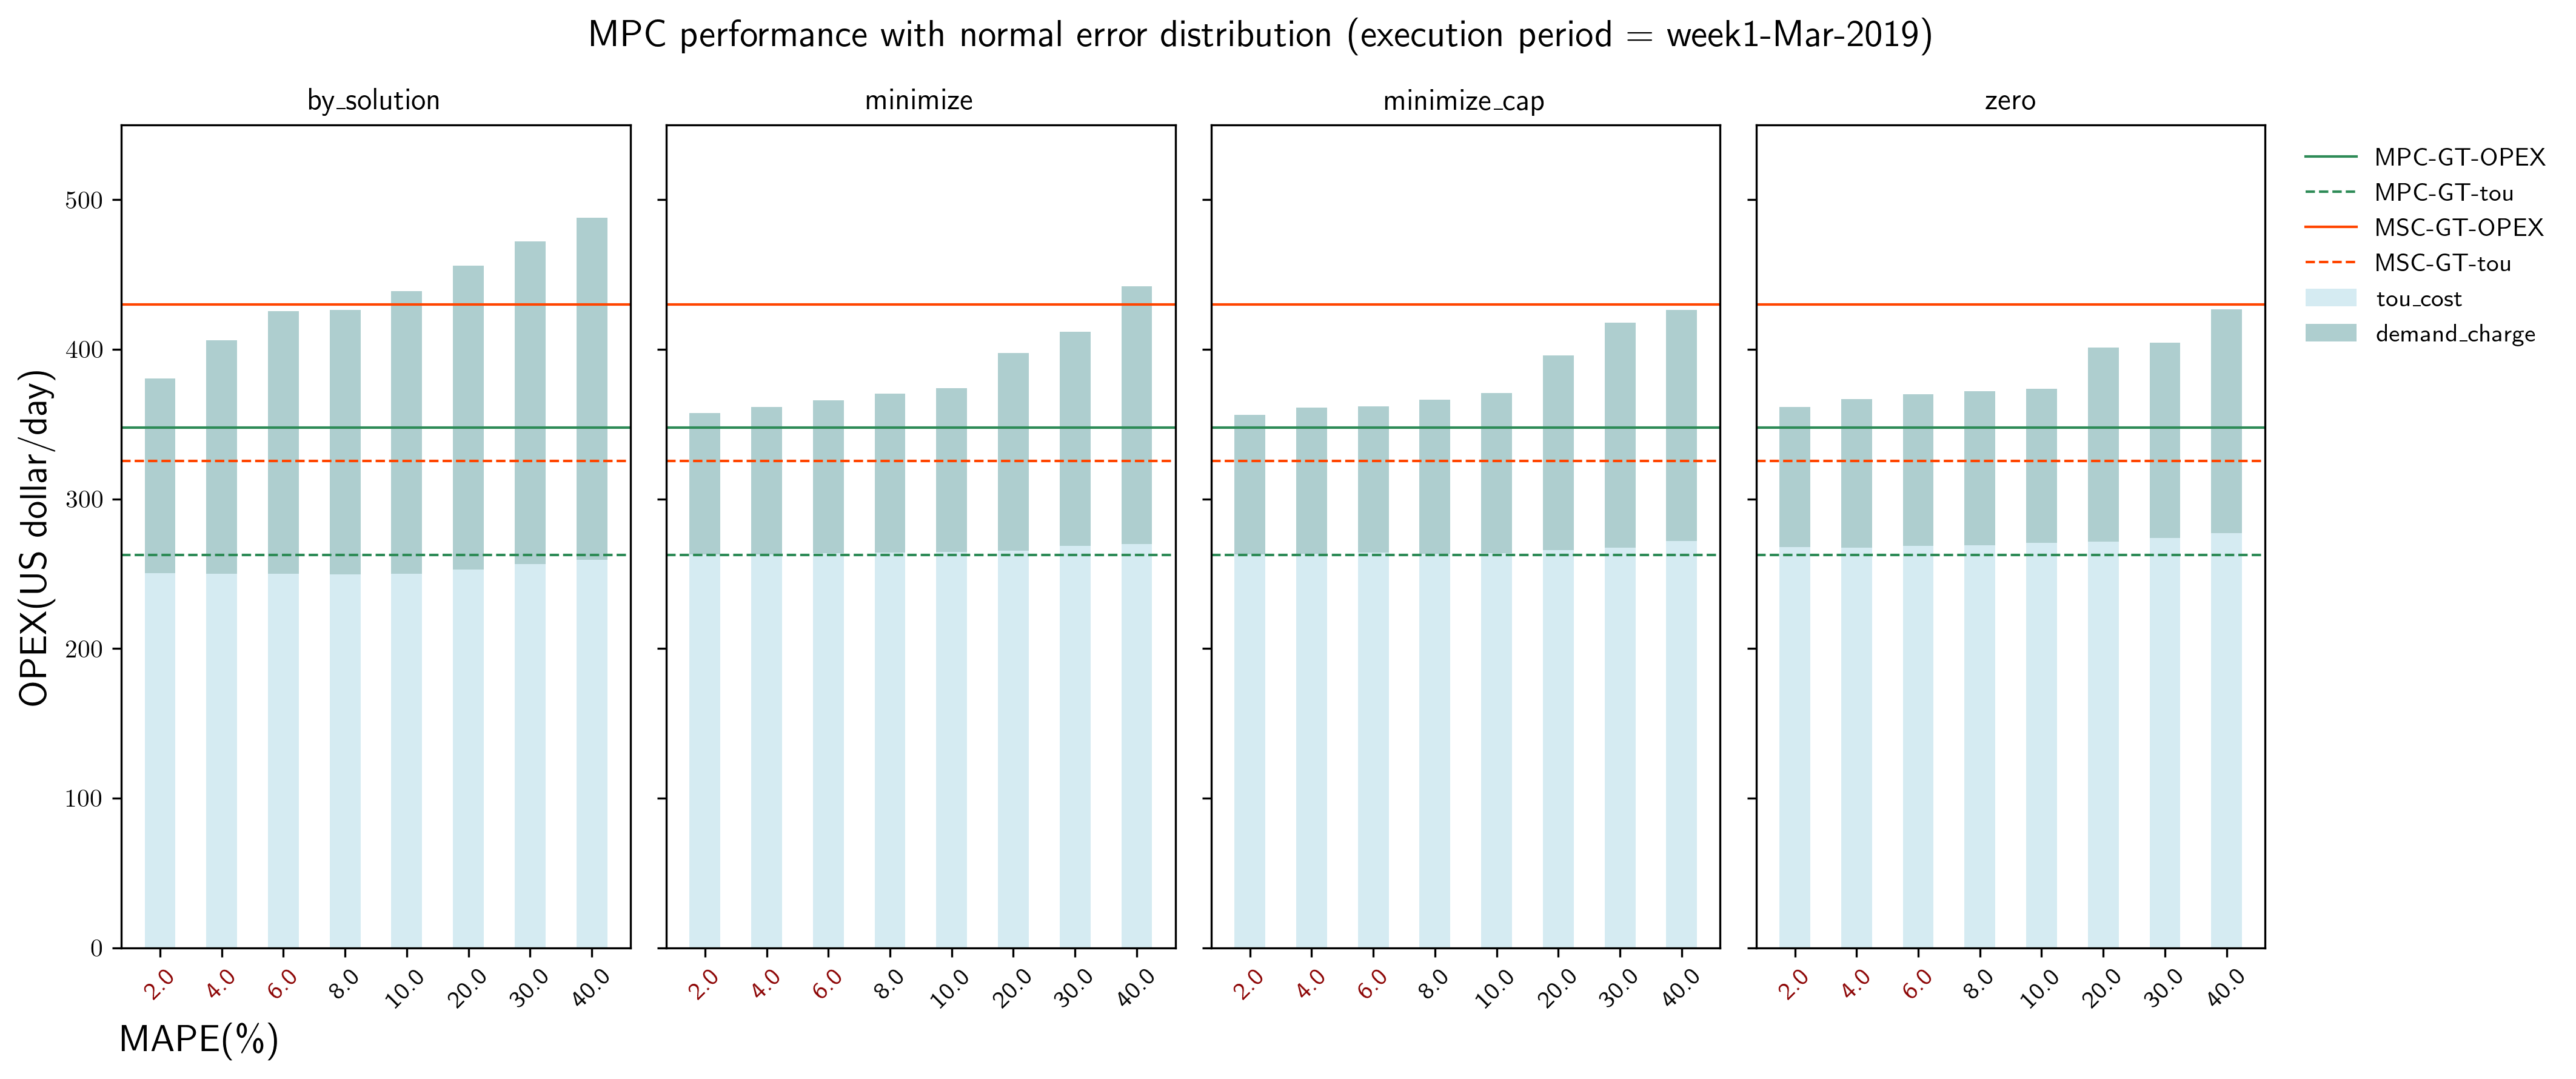

In [10]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"by_solution",
            "subtitle":"by_solution",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "1":{       
            "key":"OPEX",
            "method":"minimize",
            "subtitle":"minimize",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"minimize_cap",
            "subtitle":"minimize_cap",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "3":{
            "key":"OPEX",
            "method":"zero",
            "subtitle":"zero",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"p_grid_max_method",
    "df":df_march_week1_normal,   
    "relative":False,
    "fontsize":10,
    "n_subplots":4,
    "figsize":(14,6),
    "show_notes":False,
    "bbox_to_anchor":(1.6,1),
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic3-6h-bat-march-week1-normal.png',
    "suptitle":"MPC performance with normal error distribution (execution period = week1-Mar-2019)"
}
r_opex_month_6dc=mplot_disturbance_type(plot_params)

b. period = 1 month

In [29]:
# load_data
path=path_prefix+r"\output\experiments\thesis_topic3\6h-bat-6months-disturbance-type.xlsx"
df_method=pd.read_excel(path)

valid_df=df_method[df_method["status"]=='D']
valid_df.reset_index(inplace=True)
'''
# filter error scale
valid_df_=valid_df.loc[valid_df["disturbance_scale"].isin([0.02,0.04,0.06,0.08,0.1])]
valid_df_ref=valid_df.loc[valid_df["pred_model"].isin(['GT'])]
valid_df=pd.concat([valid_df_,valid_df_ref])'''

# filter data
start, end="03-01", "04-01"
df_march=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

start, end="06-01", "07-01"
df_june=valid_df[(valid_df["start"]==start) & (valid_df["end"]==end)]

In [30]:
df_june_normal=df_june.drop(df_june.loc\
    [df_june["disturbance_rule"].isin(\
        ["normal_pos","normal_neg","uniform","uniform_neg","uniform_pos"])].index).copy()

df_march_normal=df_march.drop(df_march.loc\
    [df_march["disturbance_rule"].isin(\
        ["normal_pos","normal_neg","uniform","uniform_neg","uniform_pos"])].index).copy()

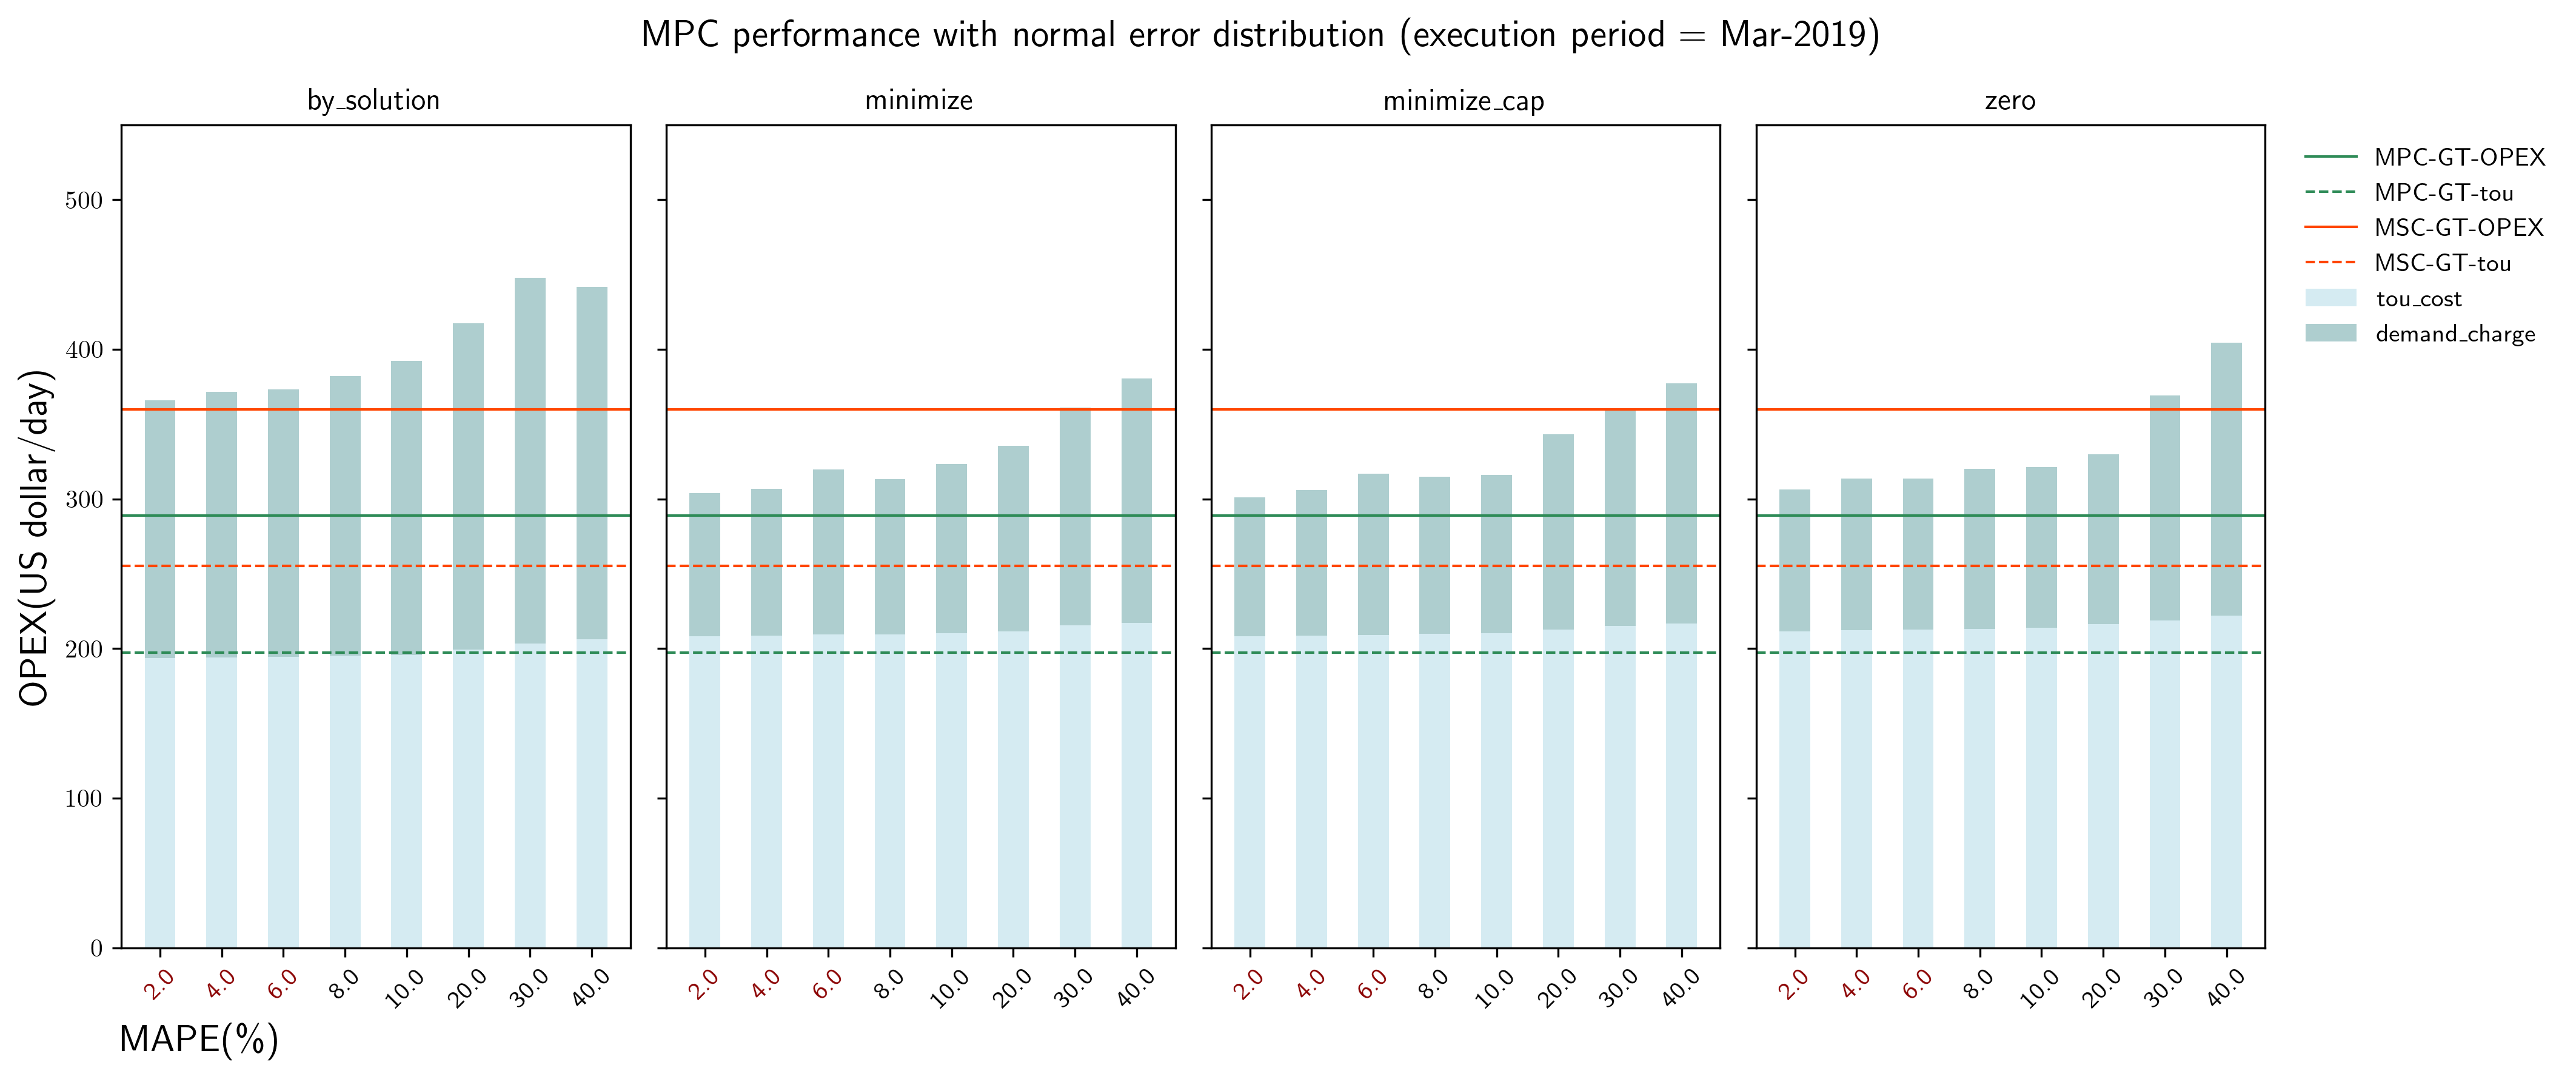

In [31]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"by_solution",
            "subtitle":"by_solution",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "1":{       
            "key":"OPEX",
            "method":"minimize",
            "subtitle":"minimize",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"minimize_cap",
            "subtitle":"minimize_cap",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "3":{
            "key":"OPEX",
            "method":"zero",
            "subtitle":"zero",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"p_grid_max_method",
    "df":df_march_normal,   
    "relative":False,
    "fontsize":10,
    "n_subplots":4,
    "figsize":(14,6),
    "show_notes":False,
    "bbox_to_anchor":(1.6,1),
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic3-6h-bat-march-month-normal.png',
    "suptitle":"MPC performance with normal error distribution (execution period = Mar-2019)"
}
r_opex_month_6dc=mplot_disturbance_type(plot_params)

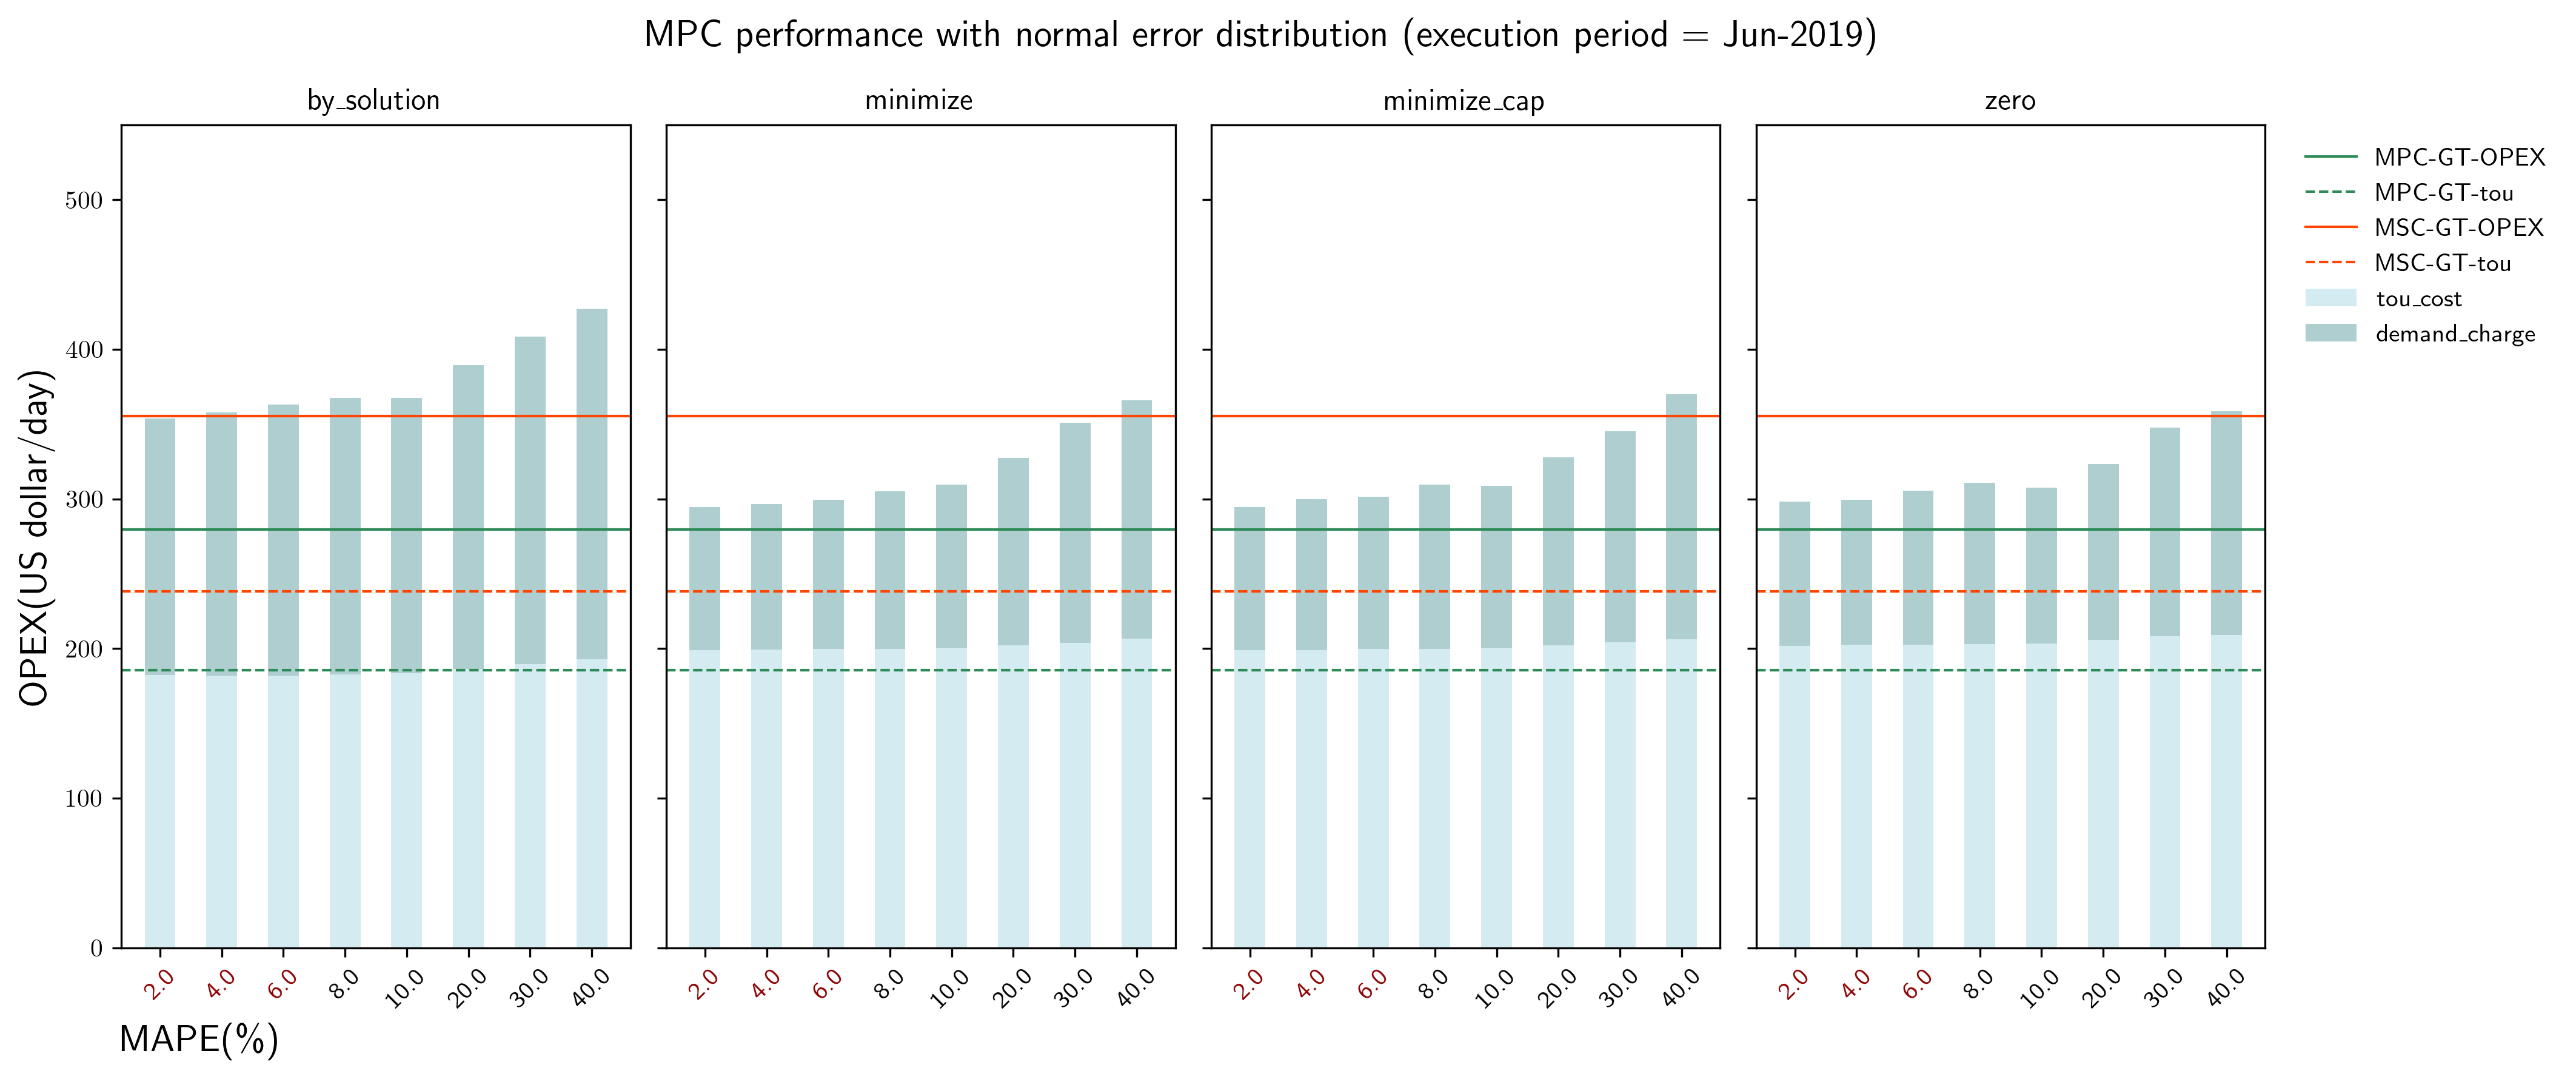

In [32]:
plot_params={
    "subplots":{
        "0":{       
            "key":"OPEX",
            "method":"by_solution",
            "subtitle":"by_solution",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "1":{       
            "key":"OPEX",
            "method":"minimize",
            "subtitle":"minimize",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "2":{
            "key":"OPEX",
            "method":"minimize_cap",
            "subtitle":"minimize_cap",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
        "3":{
            "key":"OPEX",
            "method":"zero",
            "subtitle":"zero",
            "limit":[0,550],
            "x_key":"disturbance_scale"
            },
    },
    "compare_key":"p_grid_max_method",
    "df":df_june_normal,   
    "relative":False,
    "fontsize":10,
    "n_subplots":4,
    "figsize":(14,6),
    "show_notes":False,
    "bbox_to_anchor":(1.6,1),
    #"marker_s":250,
    "sharey":True,
    "show_line":False,
    "save_fn":'multi-thesis-topic3-6h-bat-june-month-normal.png',
    "suptitle":"MPC performance with normal error distribution (execution period = Jun-2019)"
}
r_opex_month_6dc=mplot_disturbance_type(plot_params)